### Used Car Price Prediction

### Data Cleaning and Preprocessing

In [41]:
import pandas as pd 
import numpy
import seaborn as sns 
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("car_details.csv")
df

C:\Users\plangote\AppData\Local\Temp\ipykernel_13544\965388365.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("car_details.csv")


,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Power Steering,Power Windows Front,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Air Conditioner,Heater,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Wheel Covers,Power Antenna,Chrome Grille,Centeral Locking,Child Safety Locks,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Halogen Headlamps,Rear Seat Belts,Door Ajar Warning,Side Impact Beams,Front Impact Beams,Adjustable Seats,Centrally Mounted Fuel Tank,Engine Immobilizer,Anti Theft Device,Trunk Light,Multifunction Steering Wheel,Navigation System,Smart Access Card Entry,Engine Start Stop Button,Gear Shift Indicator,Luggage Hook And Net,Adjustable Steering,Tachometer,Leather Steering Wheel,Outside Temperature Display,Height Adjustable Driver Seat,Fog Lights Front,Power Adjustable Exterior Rear View Mirror,Electric Folding Rear View Mirror,Rear Window Wiper,Rear Window Washer,Rear Window Defogger,Alloy Wheels,Integrated Antenna,Outside Rear View Mirror Turn Indicators,Roof Rail,Anti Lock Braking System,Power Door Locks,Driver Air Bag,Passenger Air Bag,Seat Belt Warning,Keyless Entry,Engine Check Warning,Crash Sensor,Ebd,Follow Me Home Headlamps,Rear Camera,Speed Sensing Auto Door Lock,Pretensioners And Force Limiter Seatbelts,Impact Sensing Auto Door Lock,No Of Airbags,Cd Player,Radio,Speakers Front,Speakers Rear,Integrated2Din Audio,Usb Auxiliary Input,Bluetooth,Touch Screen,Number Of Speaker,Glove Box Cooling,Driving Experience Control Eco,Tinted Glass,Rear Spoiler,Chrome Garnish,Vehicle Stability Control System,Rear Reading Lamp,Rear Seat Centre Arm Rest,Cup Holders Rear,Rear ACVents,Air Quality Control,Height Adjustable Front Seat Belts,Cruise Control,Voice Control,Audio System Remote Control,Leather Seats,Fog Lights Rear,Traction Control,Seat Lumbar Support,Battery Saver,Lane Change Indicator,Sun Roof,Automatic Driving Lights,Anti Theft Alarm,Automatic Head Lamps,Isofix Child Seat Mounts,Hill Assist,Tailgate Ajar,Steering Wheel Gearshift Paddles,LEDTaillights,Brake Assist,Cigarette Lighter,Rain Sensing Wiper,Drive Modes,Active Noise Cancellation,Adjustable Headrest,Hands Free Tailgate,Dual Tone Dashboard,Leather Wrap Gear Shift Selector,Dual Tone Body Colour,LEDDRLs,LEDHeadlights,Cornering Headlamps,Cornering Foglamps,Side Air Bag Front,Side Air Bag Rear,Tyre Pressure Monitor,Clutch Lock,Anti Pinch Power Windows,Knee Airbags,Apple Car Play,Android Auto,Mirror Link,Wireless Phone Charging,Compass,Moon Roof,Projector Headlamps,Speed Alert,Eletronic Stability Control,Touch Screen Size,Xenon Headlamps,Cd Changer,Power Boot,Rear Folding Table,Smoke Headlamps,Dvd Player,Internal Storage,Rear Entertainment System,Remote Engine Start Stop,Ventilated Seats,LEDFog Lamps,View360Camera,Geo Fence Alert,Steering Mounted Tripmeter,Remote Climate Control,Remote Horn Light Control,Heated Wing Mirror,Side Stepper,Blind Spot Monitor,Hill Descent Control,Heads Up Display,Sos Emergency Assistance,Cassette Player,Find My Car Location,Wifi Connectivity,Headlamp Washers,Real Time Vehicle Tracking,Roof Carrier,Smart Key Band,Lane Watch Camera,Removable Convertible Top,Power Folding3rd Row Seat,Mileage,Engine,Max Power,Torque,Seats.1,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Spee

In [43]:
pd.set_option("display.max_columns", None)

In [44]:
df.drop(columns=['owner', 'trendingText','Fuel Type', 'Registration Year', 'Seats', 'Year of Manufacture', 'Ownership', 'Kms Driven', 'Transmission', 'Engine', 'Displacement'], axis=1, inplace=True, errors='ignore')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Columns: 230 entries, it to city
dtypes: float64(9), int64(175), object(46)
memory usage: 14.7+ MB


In [46]:
df.dtypes

it                           int64
ft                          object
bt                          object
km                          object
transmission                object
                             ...  
Cargo Volumn                object
Wheel Size                  object
Alloy Wheel Size            object
Ground Clearance Unladen    object
city                        object
Length: 230, dtype: object

In [47]:
df.isnull().sum().tolist()

[0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6699,
 8369,
 0,
 4,
 894,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1483,
 0,
 0,
 1483,
 0,
 0,
 2501,
 287,
 60,
 60,
 6,
 3,
 295,
 60,
 31,
 51,
 2216,
 1727,
 5964,
 6474,
 1040,
 1962,
 79,
 83,
 79,
 163,
 3558,
 3570,
 59,
 4541,
 106,
 1560,
 6,
 255,
 1600,
 96,
 96,
 3762,
 3512,
 77,
 11,
 1593,
 2983,
 2983,


In [48]:
df.columns[df.isnull().any()].tolist()

['bt',
 'priceActual',
 'priceSaving',
 'Insurance Validity',
 'RTO',
 'Engine Displacement',
 'Headlamp Washers',
 'Smart Key Band',
 'Power Folding3rd Row Seat',
 'Mileage',
 'Max Power',
 'Torque',
 'Seats.1',
 'Color',
 'Engine Type',
 'Max Torque',
 'No of Cylinder',
 'Values per Cylinder',
 'Value Configuration',
 'Fuel Suppy System',
 'BoreX Stroke',
 'Compression Ratio',
 'Turbo Charger',
 'Super Charger',
 'Length',
 'Width',
 'Height',
 'Wheel Base',
 'Front Tread',
 'Rear Tread',
 'Kerb Weight',
 'Gross Weight',
 'Gear Box',
 'Drive Type',
 'Seating Capacity',
 'Steering Type',
 'Turning Radius',
 'Front Brake Type',
 'Rear Brake Type',
 'Top Speed',
 'Acceleration',
 'Tyre Type',
 'No Door Numbers',
 'Cargo Volumn',
 'Wheel Size',
 'Alloy Wheel Size',
 'Ground Clearance Unladen']

In [49]:
# Get the count of missing values for each column
missing_value_counts = df.isnull().sum()

# Filter out columns with no missing values
missing_columns = missing_value_counts[missing_value_counts > 0]

# Display the column names and their missing value counts
missing_columns

bt                              4
priceActual                  6699
priceSaving                  8369
Insurance Validity              4
RTO                           894
Engine Displacement             4
Headlamp Washers             1483
Smart Key Band               1483
Power Folding3rd Row Seat    2501
Mileage                       287
Max Power                      60
Torque                         60
Seats.1                         6
Color                           3
Engine Type                   295
Max Torque                     60
No of Cylinder                 31
Values per Cylinder            51
Value Configuration          2216
Fuel Suppy System            1727
BoreX Stroke                 5964
Compression Ratio            6474
Turbo Charger                1040
Super Charger                1962
Length                         79
Width                          83
Height                         79
Wheel Base                    163
Front Tread                  3558
Rear Tread    

In [50]:
df.drop(columns=["Alloy Wheel Size", "priceSaving", 'km', 'priceFixedText'], axis=1, inplace=True, errors='ignore')

In [51]:
df.drop(columns=['Seats.1'], inplace=True)
print(df)

      it      ft         bt transmission  ownerNo            oem  \
0      0  Petrol  Hatchback       Manual        3         Maruti   
1      0  Petrol        SUV       Manual        2           Ford   
2      0  Petrol  Hatchback       Manual        1           Tata   
3      0  Petrol      Sedan       Manual        1        Hyundai   
4      0  Diesel        SUV       Manual        1         Maruti   
...   ..     ...        ...          ...      ...            ...   
8364   0  Petrol  Hatchback       Manual        1         Maruti   
8365   0  Petrol  Hatchback       Manual        1         Maruti   
8366   0  Petrol      Sedan    Automatic        3  Mercedes-Benz   
8367   0  Petrol  Hatchback       Manual        1         Maruti   
8368   0  Diesel        SUV       Manual        2        Renault   

                      model  modelYear  centralVariantId  \
0            Maruti Celerio       2015              3979   
1             Ford Ecosport       2018              6087   
2  

In [52]:
import re

def find_columns_with_units(df):
    # Define the pattern for unit values
    unit_pattern = r'\d+\s?(?:km|kmph|Kmph|seconds|litres|km/hr|mm|inch|kg|hp|bhp|lakhs|rpm|CC|₹|PS|,)'
    
    # Initialize a list to store columns that contain unit values
    columns_with_units = []

    # Iterate through each column in the DataFrame
    for col in df.select_dtypes(include='object').columns:
        # Check if any value in the column matches the unit pattern
        if df[col].str.contains(unit_pattern, case=False, na=False).any():
            columns_with_units.append(col)
    
    return columns_with_units

# Identify columns with unit values
columns_with_units = find_columns_with_units(df)
print("Columns with unit values:", columns_with_units)


Columns with unit values: ['variantName', 'price', 'Engine Displacement', 'Mileage', 'Max Power', 'Torque', 'Max Torque', 'BoreX Stroke', 'Compression Ratio', 'Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight', 'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration', 'Cargo Volumn', 'Ground Clearance Unladen']


In [53]:
print(df.iloc[:,:100].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 100 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   it                                             8369 non-null   int64 
 1   ft                                             8369 non-null   object
 2   bt                                             8365 non-null   object
 3   transmission                                   8369 non-null   object
 4   ownerNo                                        8369 non-null   int64 
 5   oem                                            8369 non-null   object
 6   model                                          8369 non-null   object
 7   modelYear                                      8369 non-null   int64 
 8   centralVariantId                               8369 non-null   int64 
 9   variantName                                    8369 non-null  

In [54]:
print(df.iloc[:,100:200].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 100 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Chrome Garnish                      8369 non-null   int64  
 1   Vehicle Stability Control System    8369 non-null   int64  
 2   Rear Reading Lamp                   8369 non-null   int64  
 3   Rear Seat Centre Arm Rest           8369 non-null   int64  
 4   Cup Holders Rear                    8369 non-null   int64  
 5   Rear ACVents                        8369 non-null   int64  
 6   Air Quality Control                 8369 non-null   int64  
 7   Height Adjustable Front Seat Belts  8369 non-null   int64  
 8   Cruise Control                      8369 non-null   int64  
 9   Voice Control                       8369 non-null   int64  
 10  Audio System Remote Control         8369 non-null   int64  
 11  Leather Seats                       8369 n

In [55]:
print(df.iloc[:,200:225].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Turbo Charger             7329 non-null   object 
 1   Super Charger             6407 non-null   object 
 2   Length                    8290 non-null   object 
 3   Width                     8286 non-null   object 
 4   Height                    8290 non-null   object 
 5   Wheel Base                8206 non-null   object 
 6   Front Tread               4811 non-null   object 
 7   Rear Tread                4799 non-null   object 
 8   Kerb Weight               8310 non-null   object 
 9   Gross Weight              3828 non-null   object 
 10  Gear Box                  8263 non-null   object 
 11  Drive Type                6809 non-null   object 
 12  Seating Capacity          8363 non-null   float64
 13  Steering Type             8114 non-null   object 
 14  Turning 

In [56]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Load your DataFrame
# df = pd.read_csv('your_data.csv')

# Handling numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df[col].dtype == 'float64':
        # Use mean for float columns
        df[col].fillna(df[col].mean(), inplace=True)
    elif df[col].dtype == 'int64':
        # Use median for int columns
        df[col].fillna(df[col].median(), inplace=True)

# Handling categorical columns
categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check the DataFrame after filling missing values
print(df.info())


C:\Users\plangote\AppData\Local\Temp\ipykernel_13544\1799774530.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\plangote\AppData\Local\Temp\ipykernel_13544\1799774530.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Columns: 225 entries, it to city
dtypes: float64(7), int64(174), object(44)
memory usage: 14.4+ MB
None


In [57]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Reset the index in place
df.reset_index(drop=True, inplace=True)

# Check the DataFrame to confirm the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Columns: 225 entries, it to city
dtypes: float64(7), int64(174), object(44)
memory usage: 14.2+ MB
None


In [58]:
print(df.iloc[:,:100].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 100 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   it                                             8260 non-null   int64 
 1   ft                                             8260 non-null   object
 2   bt                                             8260 non-null   object
 3   transmission                                   8260 non-null   object
 4   ownerNo                                        8260 non-null   int64 
 5   oem                                            8260 non-null   object
 6   model                                          8260 non-null   object
 7   modelYear                                      8260 non-null   int64 
 8   centralVariantId                               8260 non-null   int64 
 9   variantName                                    8260 non-null  

In [59]:
print(df.iloc[:,100:200].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 100 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Chrome Garnish                      8260 non-null   int64  
 1   Vehicle Stability Control System    8260 non-null   int64  
 2   Rear Reading Lamp                   8260 non-null   int64  
 3   Rear Seat Centre Arm Rest           8260 non-null   int64  
 4   Cup Holders Rear                    8260 non-null   int64  
 5   Rear ACVents                        8260 non-null   int64  
 6   Air Quality Control                 8260 non-null   int64  
 7   Height Adjustable Front Seat Belts  8260 non-null   int64  
 8   Cruise Control                      8260 non-null   int64  
 9   Voice Control                       8260 non-null   int64  
 10  Audio System Remote Control         8260 non-null   int64  
 11  Leather Seats                       8260 n

In [60]:
print(df.iloc[:,200:225].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Turbo Charger             8260 non-null   object 
 1   Super Charger             8260 non-null   object 
 2   Length                    8260 non-null   object 
 3   Width                     8260 non-null   object 
 4   Height                    8260 non-null   object 
 5   Wheel Base                8260 non-null   object 
 6   Front Tread               8260 non-null   object 
 7   Rear Tread                8260 non-null   object 
 8   Kerb Weight               8260 non-null   object 
 9   Gross Weight              8260 non-null   object 
 10  Gear Box                  8260 non-null   object 
 11  Drive Type                8260 non-null   object 
 12  Seating Capacity          8260 non-null   float64
 13  Steering Type             8260 non-null   object 
 14  Turning 

In [61]:
df.isnull().sum()

it                          0
ft                          0
bt                          0
transmission                0
ownerNo                     0
                           ..
No Door Numbers             0
Cargo Volumn                0
Wheel Size                  0
Ground Clearance Unladen    0
city                        0
Length: 225, dtype: int64

In [62]:
# Print specified columns
print(df[['Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight']])

# Print DataFrame info
df.info()

      Length   Width  Height Wheel Base Front Tread Rear Tread Kerb Weight  \
0     3715mm  1635mm  1565mm     2425mm      1420mm     1410mm       835kg   
1     3998mm  1765mm  1647mm     2519mm      1295mm     1290mm      1242Kg   
2     3746mm  1647mm  1535mm     2400mm      1400mm     1420mm      1012kg   
3     3995mm  1660mm  1520mm     2425mm      1479mm     1493mm        1180   
4     4300mm  1785mm  1595mm     2600mm      1295mm     1290mm      1230Kg   
...      ...     ...     ...        ...         ...        ...         ...   
8255  3695mm    1655    1555       2435        1430       1440         810   
8256  3395mm  1490mm  1475mm     2360mm      1295mm     1290mm       720kg   
8257  4591mm  1770mm  1447mm     2760mm      1549mm     1552mm      1585kg   
8258  3775mm  1680mm  1620mm     2360mm      1470mm     1480mm      1030kg   
8259  4315mm  1822mm  1695mm     2673mm      1560mm     1567mm        1350   

     Gross Weight  
0          1250kg  
1          1660Kg  
2  

In [63]:
# Columns to transform
columns_to_transform = ['Gear Box']

# Apply the transformation to each specified column, but only if it exists
for col in columns_to_transform:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: ''.join(re.findall(r'\d+', str(x))) if pd.notnull(x) else x)
    else:
        print(f"Column '{col}' not found in DataFrame.")

In [64]:
# Calculate the percentage of non-null values for each column
percentage_non_null = (df.notnull().sum() / len(df)) * 100

# Print the percentage of non-null values for each column
for column, percentage in percentage_non_null.items():
    print(f"Percentage of non-null values in '{column}': {percentage:.2f}%")

Percentage of non-null values in 'it': 100.00%
Percentage of non-null values in 'ft': 100.00%
Percentage of non-null values in 'bt': 100.00%
Percentage of non-null values in 'transmission': 100.00%
Percentage of non-null values in 'ownerNo': 100.00%
Percentage of non-null values in 'oem': 100.00%
Percentage of non-null values in 'model': 100.00%
Percentage of non-null values in 'modelYear': 100.00%
Percentage of non-null values in 'centralVariantId': 100.00%
Percentage of non-null values in 'variantName': 100.00%
Percentage of non-null values in 'price': 100.00%
Percentage of non-null values in 'priceActual': 100.00%
Percentage of non-null values in 'Insurance Validity': 100.00%
Percentage of non-null values in 'RTO': 100.00%
Percentage of non-null values in 'Engine Displacement': 100.00%
Percentage of non-null values in 'Power Steering': 100.00%
Percentage of non-null values in 'Power Windows Front': 100.00%
Percentage of non-null values in 'Power Windows Rear': 100.00%
Percentage of 

In [65]:
# Assuming your DataFrame is named df
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numeric_columns].skew()

# Display skewness values
print(skewness)

it                            0.000000
ownerNo                       1.888310
modelYear                    -0.917315
centralVariantId              0.006086
Power Steering               -6.610933
                               ...    
Power Folding3rd Row Seat    28.671577
No of Cylinder                5.014760
Values per Cylinder          66.294492
Seating Capacity              2.598219
No Door Numbers              -1.140350
Length: 181, dtype: float64


In [66]:
# Identify object columns
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to categorical
df[object_columns] = df[object_columns].astype('category')

# Verify the changes
print(df.dtypes)

it                             int64
ft                          category
bt                          category
transmission                category
ownerNo                        int64
                              ...   
No Door Numbers              float64
Cargo Volumn                category
Wheel Size                  category
Ground Clearance Unladen    category
city                        category
Length: 225, dtype: object


In [67]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Columns: 225 entries, it to city
dtypes: category(44), float64(7), int64(174)
memory usage: 12.4 MB
None


In [68]:
df.describe()

,it,ownerNo,modelYear,centralVariantId,Power Steering,Power Windows Front,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Air Conditioner,Heater,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Wheel Covers,Power Antenna,Chrome Grille,Centeral Locking,Child Safety Locks,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Halogen Headlamps,Rear Seat Belts,Door Ajar Warning,Side Impact Beams,Front Impact Beams,Adjustable Seats,Centrally Mounted Fuel Tank,Engine Immobilizer,Anti Theft Device,Trunk Light,Multifunction Steering Wheel,Navigation System,Smart Access Card Entry,Engine Start Stop Button,Gear Shift Indicator,Luggage Hook And Net,Adjustable Steering,Tachometer,Leather Steering Wheel,Outside Temperature Display,Height Adjustable Driver Seat,Fog Lights Front,Power Adjustable Exterior Rear View Mirror,Electric Folding Rear View Mirror,Rear Window Wiper,Rear Window Washer,Rear Window Defogger,Alloy Wheels,Integrated Antenna,Outside Rear View Mirror Turn Indicators,Roof Rail,Anti Lock Braking System,Power Door Locks,Driver Air Bag,Passenger Air Bag,Seat Belt Warning,Keyless Entry,Engine Check Warning,Crash Sensor,Ebd,Follow Me Home Headlamps,Rear Camera,Speed Sensing Auto Door Lock,Pretensioners And Force Limiter Seatbelts,Impact Sensing Auto Door Lock,No Of Airbags,Cd Player,Radio,Speakers Front,Speakers Rear,Integrated2Din Audio,Usb Auxiliary Input,Bluetooth,Touch Screen,Number Of Speaker,Glove Box Cooling,Driving Experience Control Eco,Tinted Glass,Rear Spoiler,Chrome Garnish,Vehicle Stability Control System,Rear Reading Lamp,Rear Seat Centre Arm Rest,Cup Holders Rear,Rear ACVents,Air Quality Control,Height Adjustable Front Seat Belts,Cruise Control,Voice Control,Audio System Remote Control,Leather Seats,Fog Lights Rear,Traction Control,Seat Lumbar Support,Battery Saver,Lane Change Indicator,Sun Roof,Automatic Driving Lights,Anti Theft Alarm,Automatic Head Lamps,Isofix Child Seat Mounts,Hill Assist,Tailgate Ajar,Steering Wheel Gearshift Paddles,LEDTaillights,Brake Assist,Cigarette Lighter,Rain Sensing Wiper,Drive Modes,Active Noise Cancellation,Adjustable Headrest,Hands Free Tailgate,Dual Tone Dashboard,Leather Wrap Gear Shift Selector,Dual Tone Body Colour,LEDDRLs,LEDHeadlights,Cornering Headlamps,Cornering Foglamps,Side Air Bag Front,Side Air Bag Rear,Tyre Pressure Monitor,Clutch Lock,Anti Pinch Power Windows,Knee Airbags,Apple Car Play,Android Auto,Mirror Link,Wireless Phone Charging,Compass,Moon Roof,Projector Headlamps,Speed Alert,Eletronic Stability Control,Touch Screen Size,Xenon Headlamps,Cd Changer,Power Boot,Rear Folding Table,Smoke Headlamps,Dvd Player,Internal Storage,Rear Entertainment System,Remote Engine Start Stop,Ventilated Seats,LEDFog Lamps,View360Camera,Geo Fence Alert,Steering Mounted Tripmeter,Remote Climate Control,Remote Horn Light Control,Heated Wing Mirror,Side Stepper,Blind Spot Monitor,Hill Descent Control,Heads Up Display,Sos Emergency Assistance,Cassette Player,Find My Car Location,Wifi Connectivity,Headlamp Washers,Real Time Vehicle Tracking,Roof Carrier,Smart Key Band,Lane Watch Camera,Removable Convertible Top,Power Folding3rd Row Seat,No of Cylinder,Values per Cylinder,Seating Capacity,No Door Numbers
count,8260.0,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.000000,8260.0

In [ ]:
def remove_outliers_iqr(df, cols):
    """Remove outliers from the specified columns using the IQR method."""
    for col in cols:
        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Load your DataFrame (if it's not already loaded)
# df = pd.read_csv('your_file.csv')

# List of columns to check for outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numeric_cols)

# Print the results
print("Data after removing outliers:\n", df_cleaned.describe())
print(df_cleaned)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Select numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Min-Max Scaling
df[numeric_cols] = min_max_scaler.fit_transform(df[numeric_cols])

print("Data after Min-Max Scaling:\n", df.describe())

Data after Min-Max Scaling:
            it      ownerNo    modelYear  centralVariantId  Power Steering  \
count  8260.0  8260.000000  8260.000000       8260.000000     8260.000000   
mean      0.0     0.271477     0.829263          0.447157        0.978571   
std       0.0     0.127623     0.102896          0.247879        0.144817   
min       0.0     0.000000     0.000000          0.000000        0.000000   
25%       0.0     0.200000     0.763158          0.185297        1.000000   
50%       0.0     0.200000     0.842105          0.479762        1.000000   
75%       0.0     0.400000     0.894737          0.641486        1.000000   
max       0.0     1.000000     1.000000          1.000000        1.000000   

       Power Windows Front  Power Windows Rear  Remote Trunk Opener  \
count          8260.000000         8260.000000          8260.000000   
mean              0.949031            0.848305             0.590799   
std               0.219947            0.358747             0.491

In [ ]:
print(df['transmission'].unique())

['Manual', 'Automatic']
Categories (2, object): ['Automatic', 'Manual']


In [ ]:
print(df['oem'].unique())

['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', ..., 'Mahindra Renault', 'Isuzu', 'Lexus', 'Porsche', 'Hindustan Motors']
Length: 33
Categories (33, object): ['Audi', 'BMW', 'Chevrolet', 'Citroen', ..., 'Tata', 'Toyota', 'Volkswagen', 'Volvo']


In [ ]:
print(df['city'].unique())

['Bangalore', 'chennai', 'delhi', 'hyderabad', 'jaipur', 'kolkata']
Categories (6, object): ['Bangalore', 'chennai', 'delhi', 'hyderabad', 'jaipur', 'kolkata']


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
le = LabelEncoder()

In [ ]:
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [ ]:
df

,it,ft,bt,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,priceActual,Insurance Validity,RTO,Engine Displacement,Power Steering,Power Windows Front,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Air Conditioner,Heater,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Wheel Covers,Power Antenna,Chrome Grille,Centeral Locking,Child Safety Locks,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Halogen Headlamps,Rear Seat Belts,Door Ajar Warning,Side Impact Beams,Front Impact Beams,Adjustable Seats,Centrally Mounted Fuel Tank,Engine Immobilizer,Anti Theft Device,Trunk Light,Multifunction Steering Wheel,Navigation System,Smart Access Card Entry,Engine Start Stop Button,Gear Shift Indicator,Luggage Hook And Net,Adjustable Steering,Tachometer,Leather Steering Wheel,Outside Temperature Display,Height Adjustable Driver Seat,Fog Lights Front,Power Adjustable Exterior Rear View Mirror,Electric Folding Rear View Mirror,Rear Window Wiper,Rear Window Washer,Rear Window Defogger,Alloy Wheels,Integrated Antenna,Outside Rear View Mirror Turn Indicators,Roof Rail,Anti Lock Braking System,Power Door Locks,Driver Air Bag,Passenger Air Bag,Seat Belt Warning,Keyless Entry,Engine Check Warning,Crash Sensor,Ebd,Follow Me Home Headlamps,Rear Camera,Speed Sensing Auto Door Lock,Pretensioners And Force Limiter Seatbelts,Impact Sensing Auto Door Lock,No Of Airbags,Cd Player,Radio,Speakers Front,Speakers Rear,Integrated2Din Audio,Usb Auxiliary Input,Bluetooth,Touch Screen,Number Of Speaker,Glove Box Cooling,Driving Experience Control Eco,Tinted Glass,Rear Spoiler,Chrome Garnish,Vehicle Stability Control System,Rear Reading Lamp,Rear Seat Centre Arm Rest,Cup Holders Rear,Rear ACVents,Air Quality Control,Height Adjustable Front Seat Belts,Cruise Control,Voice Control,Audio System Remote Control,Leather Seats,Fog Lights Rear,Traction Control,Seat Lumbar Support,Battery Saver,Lane Change Indicator,Sun Roof,Automatic Driving Lights,Anti Theft Alarm,Automatic Head Lamps,Isofix Child Seat Mounts,Hill Assist,Tailgate Ajar,Steering Wheel Gearshift Paddles,LEDTaillights,Brake Assist,Cigarette Lighter,Rain Sensing Wiper,Drive Modes,Active Noise Cancellation,Adjustable Headrest,Hands Free Tailgate,Dual Tone Dashboard,Leather Wrap Gear Shift Selector,Dual Tone Body Colour,LEDDRLs,LEDHeadlights,Cornering Headlamps,Cornering Foglamps,Side Air Bag Front,Side Air Bag Rear,Tyre Pressure Monitor,Clutch Lock,Anti Pinch Power Windows,Knee Airbags,Apple Car Play,Android Auto,Mirror Link,Wireless Phone Charging,Compass,Moon Roof,Projector Headlamps,Speed Alert,Eletronic Stability Control,Touch Screen Size,Xenon Headlamps,Cd Changer,Power Boot,Rear Folding Table,Smoke Headlamps,Dvd Player,Internal Storage,Rear Entertainment System,Remote Engine Start Stop,Ventilated Seats,LEDFog Lamps,View360Camera,Geo Fence Alert,Steering Mounted Tripmeter,Remote Climate Control,Remote Horn Light Control,Heated Wing Mirror,Side Stepper,Blind Spot Monitor,Hill Descent Control,Heads Up Display,Sos Emergency Assistance,Cassette Player,Find My Car Location,Wifi Connectivity,Headlamp Washers,Real Time Vehicle Tracking,Roof Carrier,Smart Key Band,Lane Watch Camera,Removable Convertible Top,Power Folding3rd Row Seat,Mileage,Max Power,Torque,Color,Engine Type,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Ground Clearance Unladen,city
0,0.0,4,2,1,0.6,20,160,0.789474,0.358244,1806,698,352,5,165,148,1.0,1.

In [ ]:
print(df['city'].unique())

[0 1 2 3 4 5]


### Exploratory Data Analysis

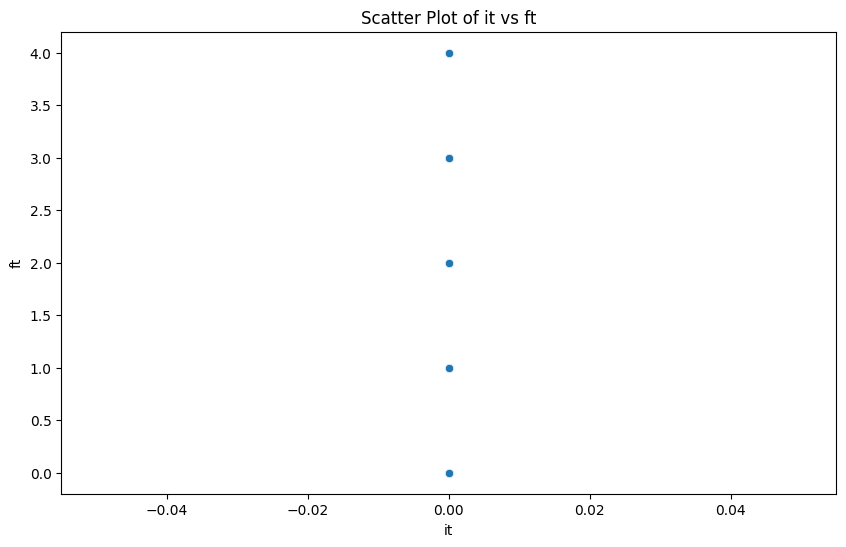

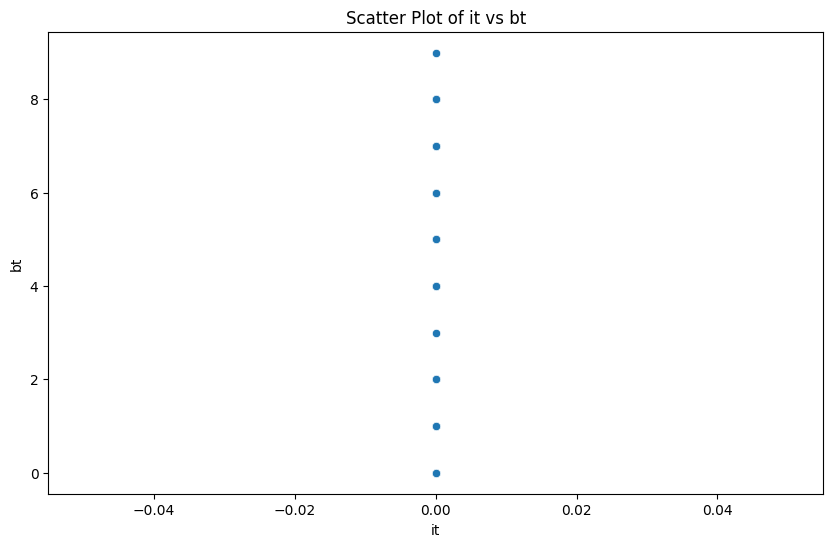

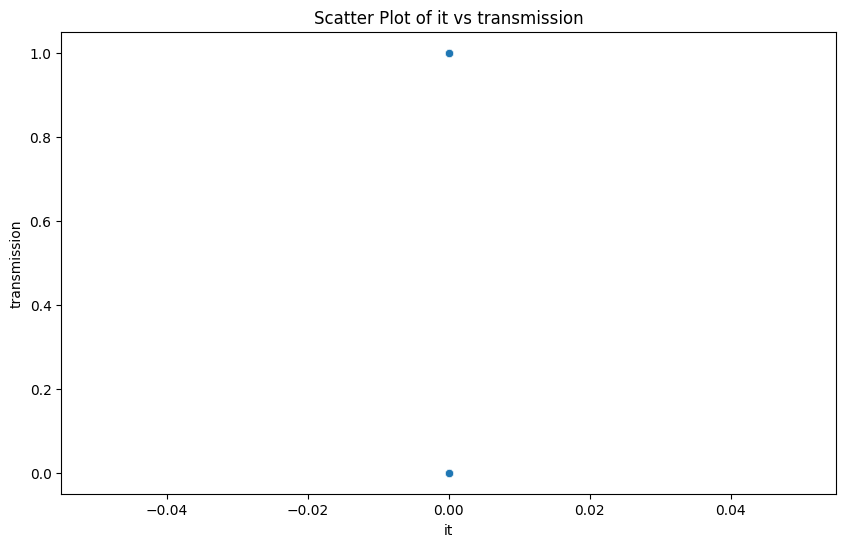

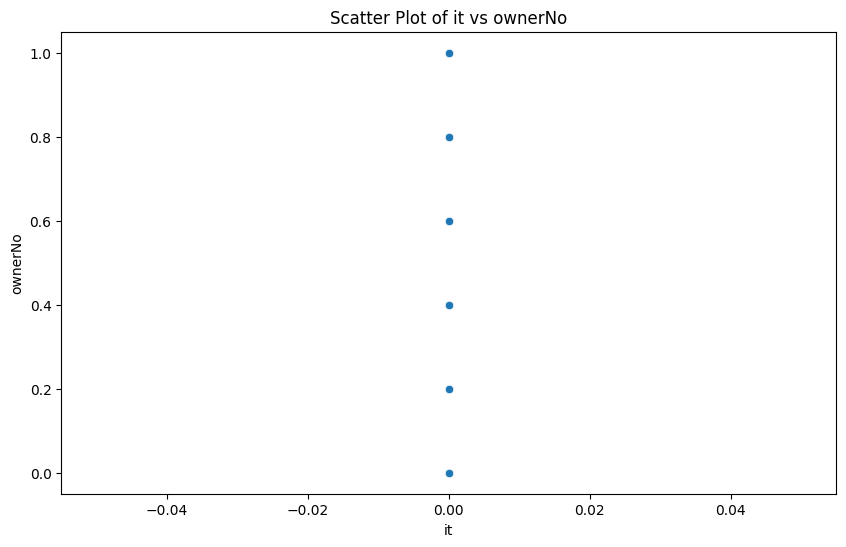

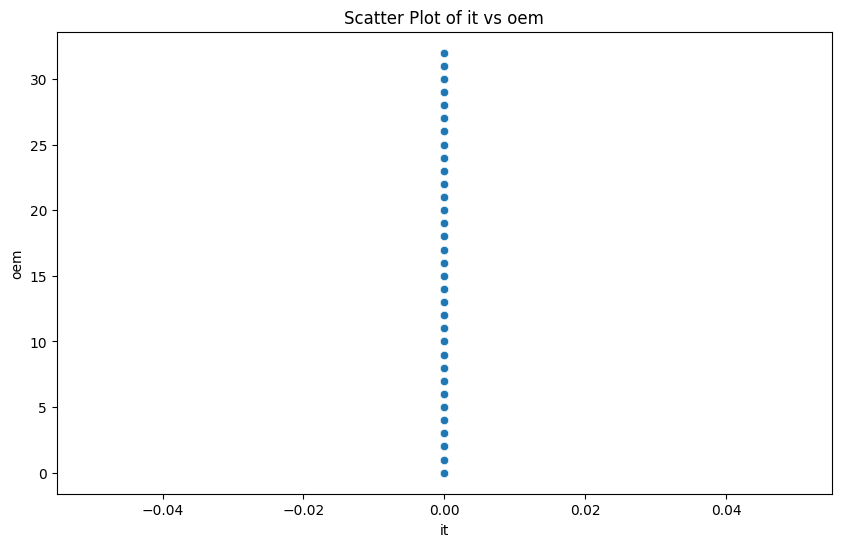

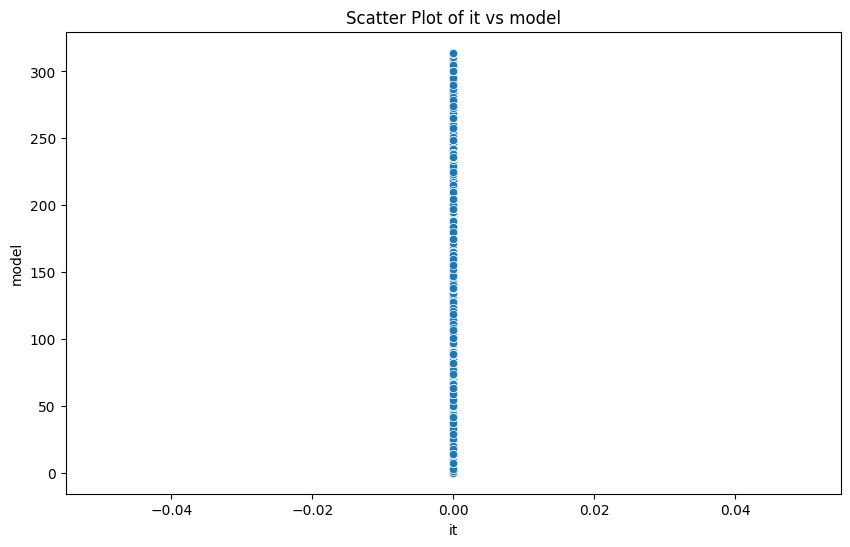

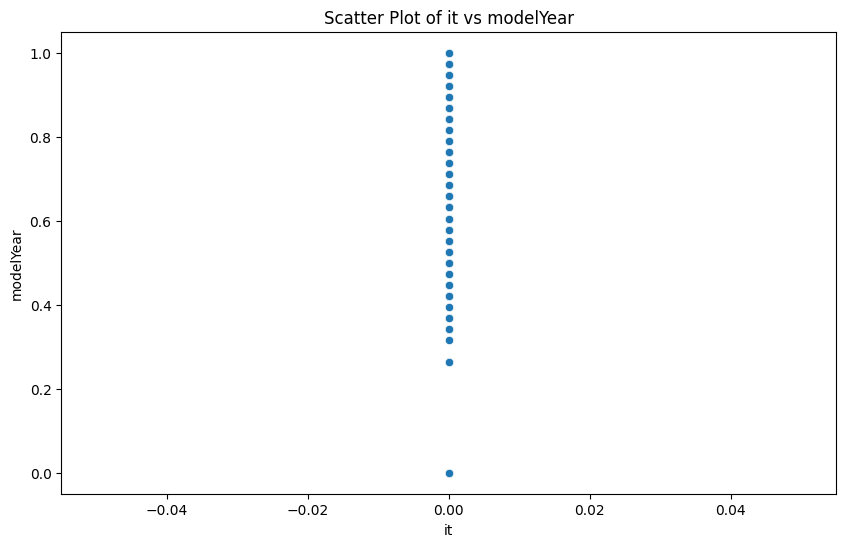

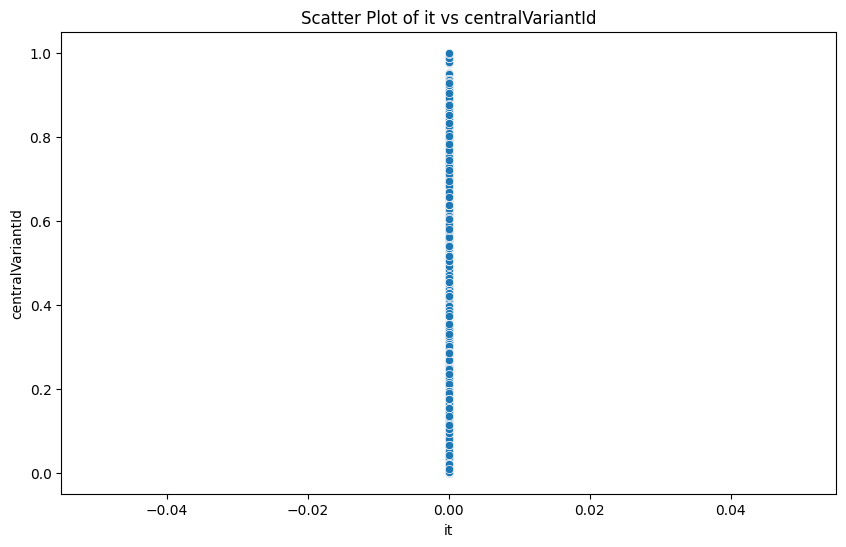

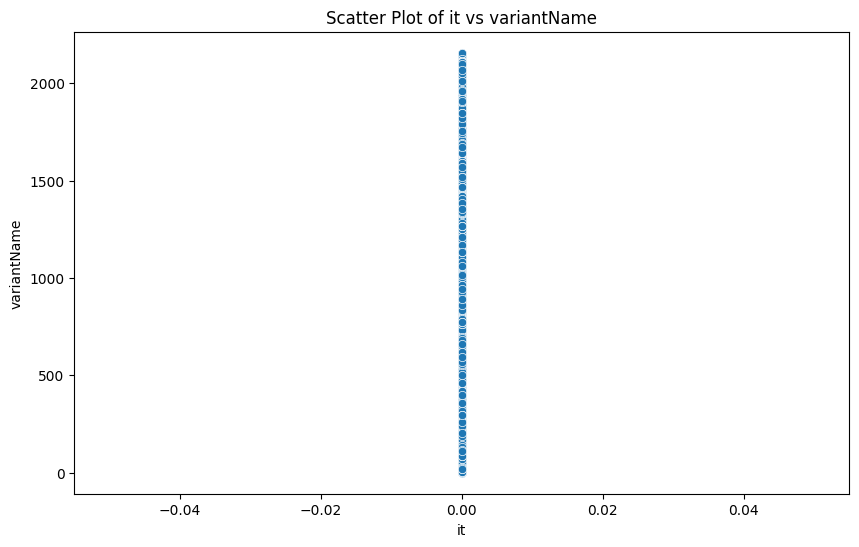

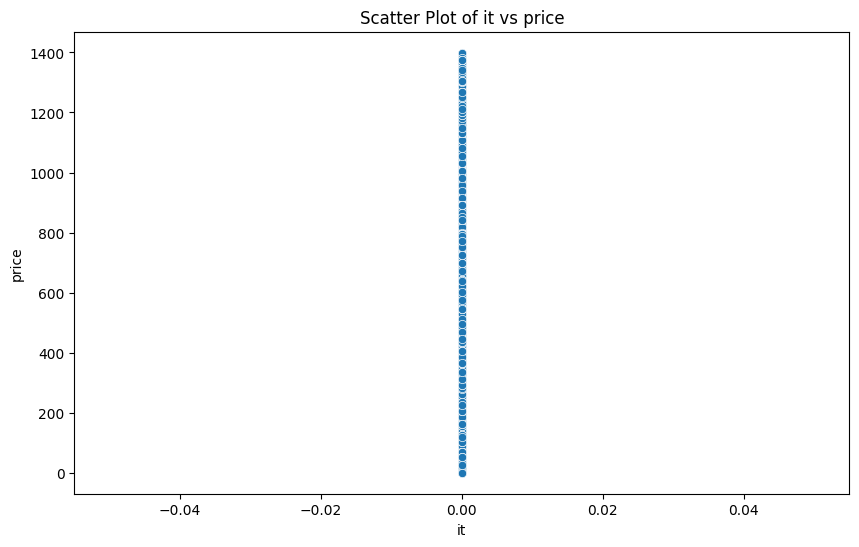

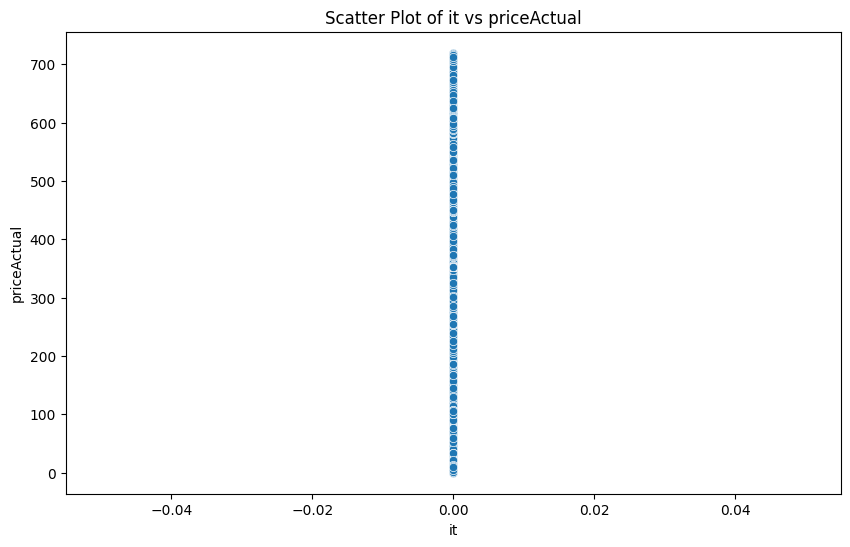

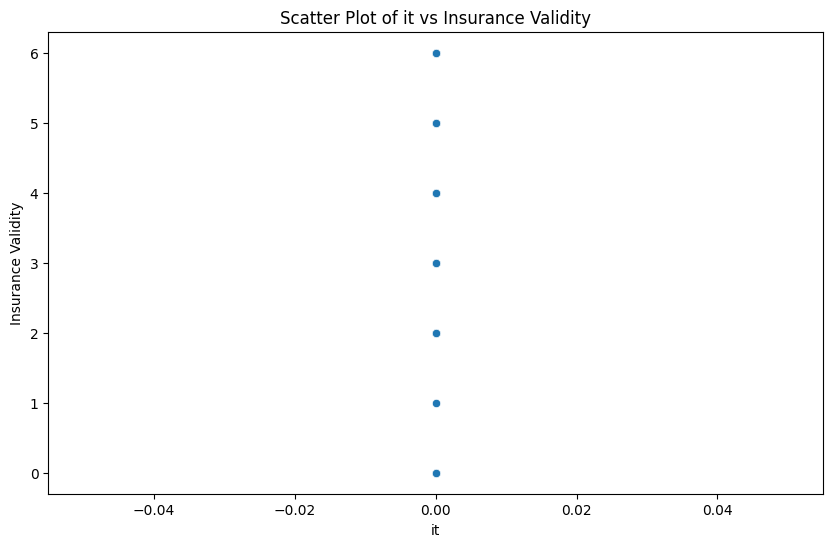

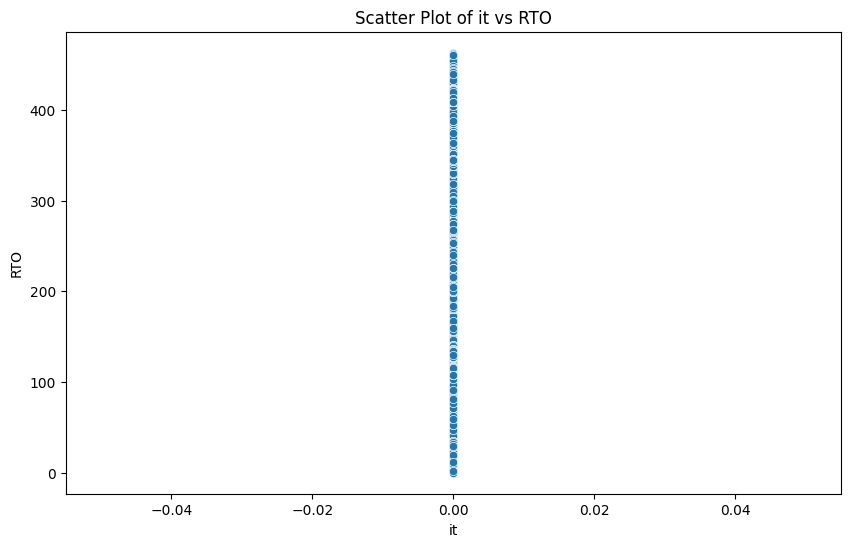

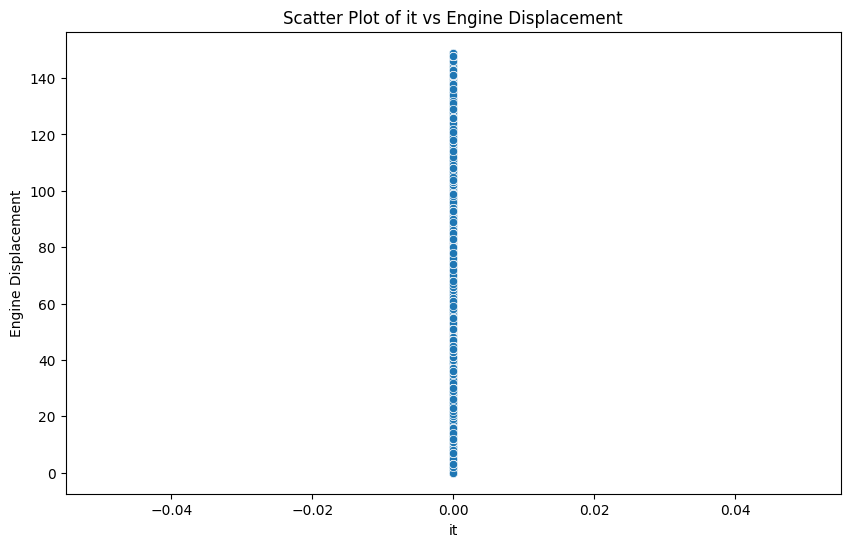

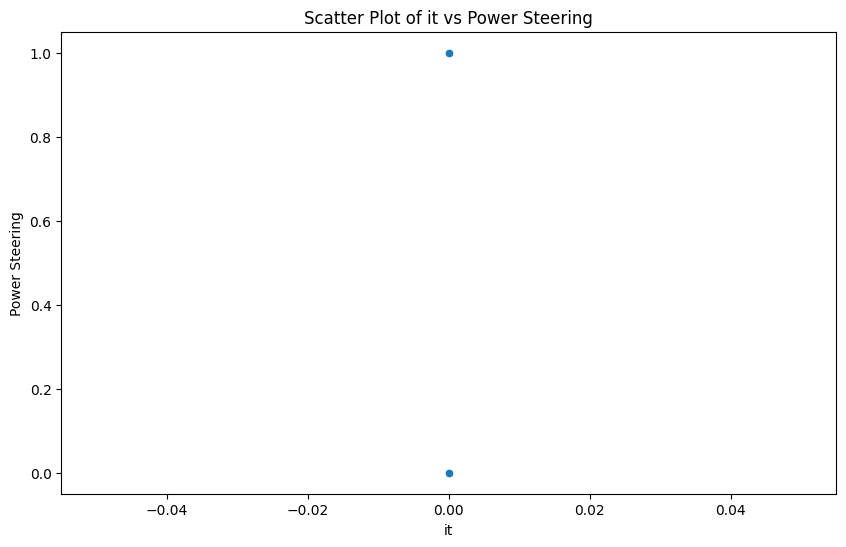

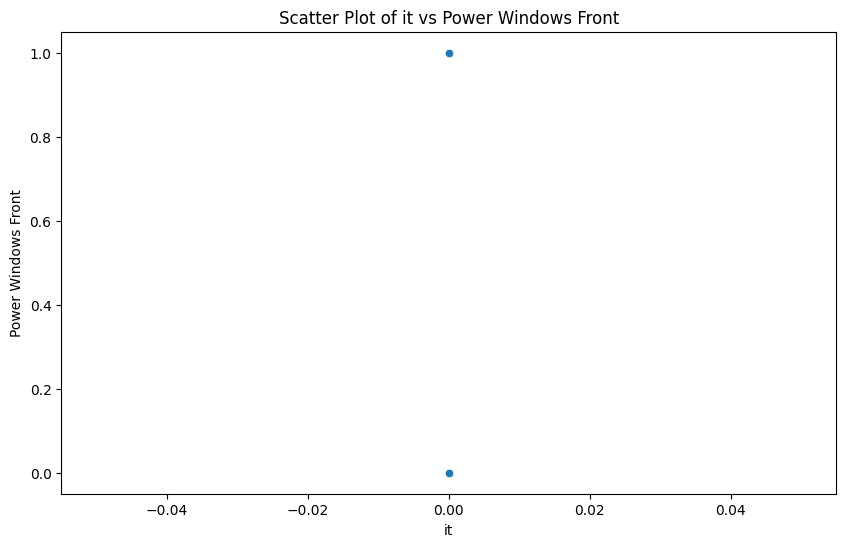

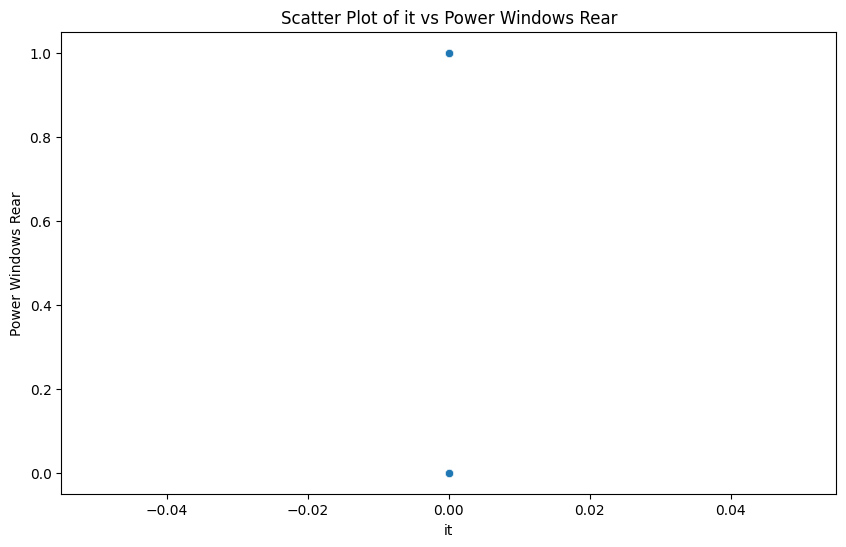

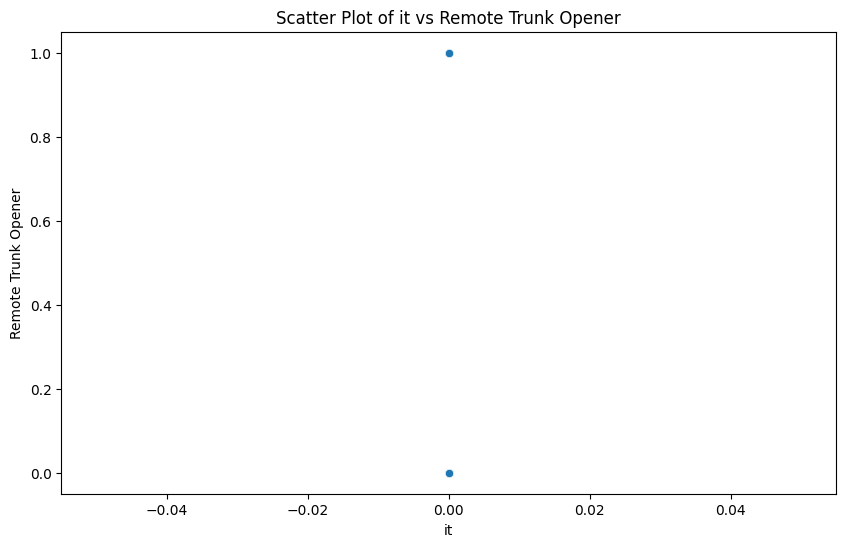

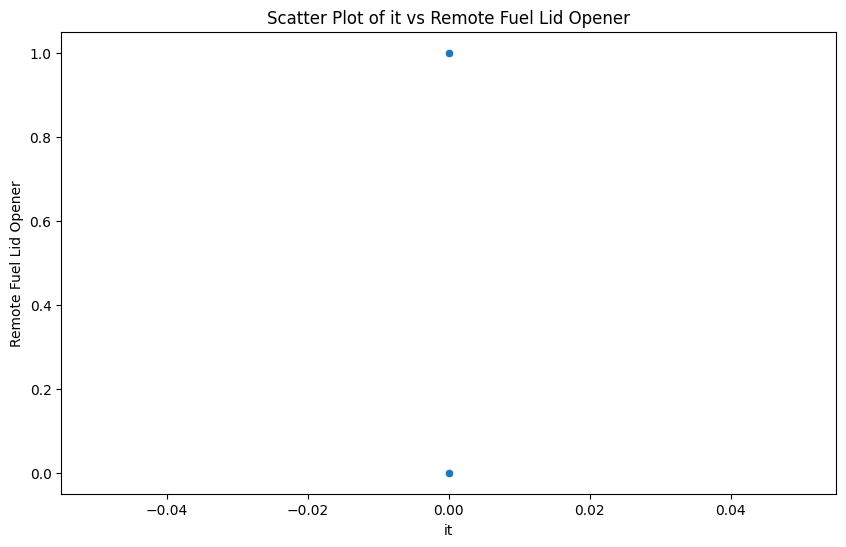

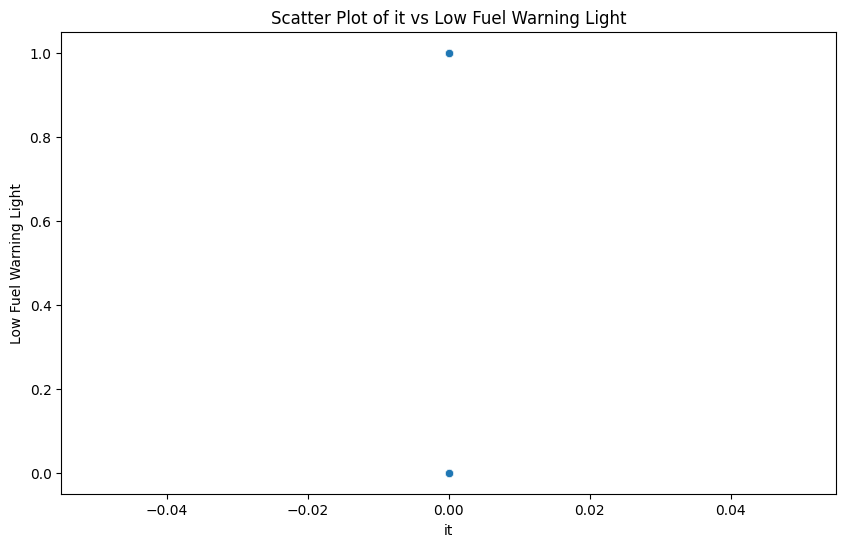

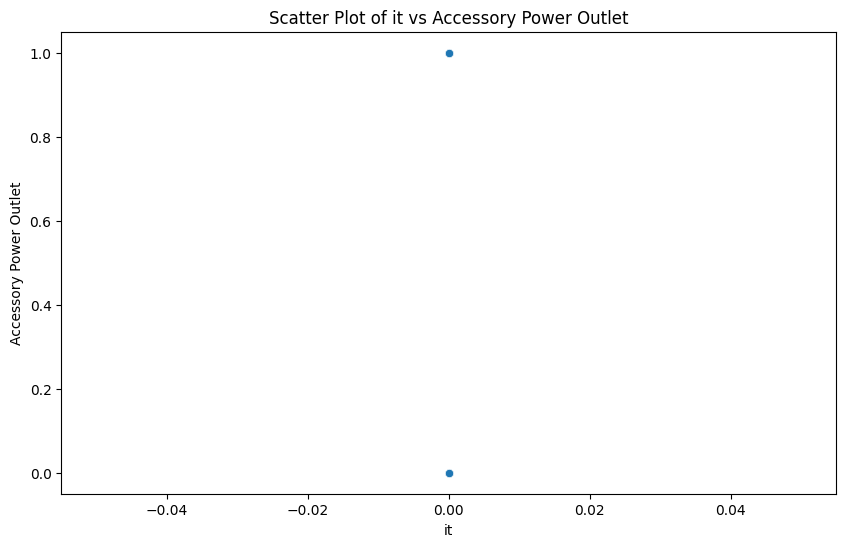

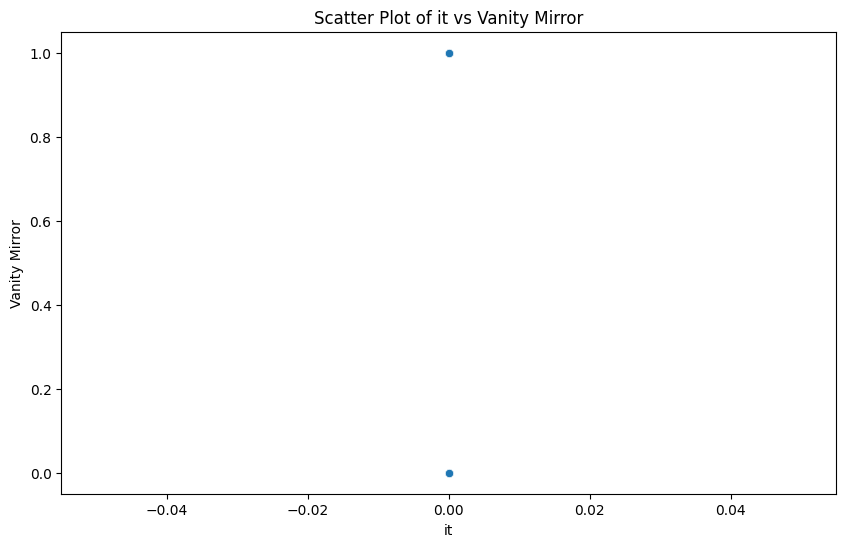

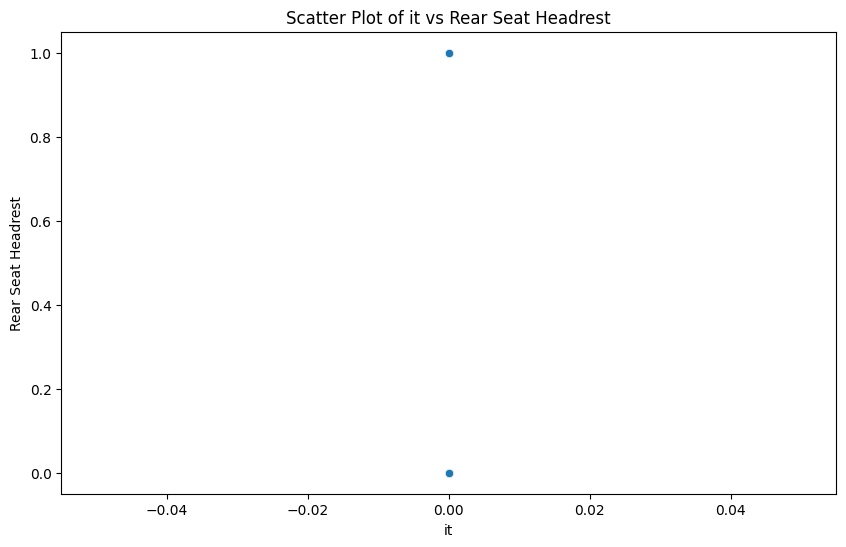

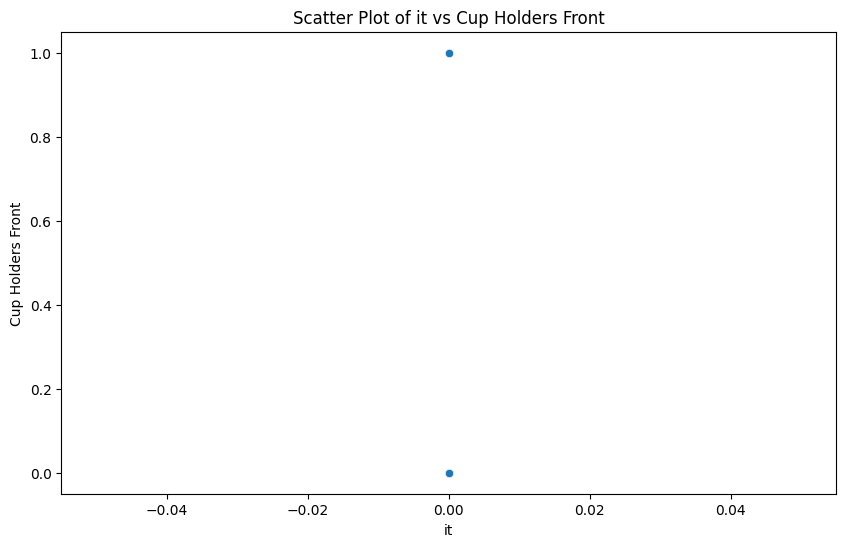

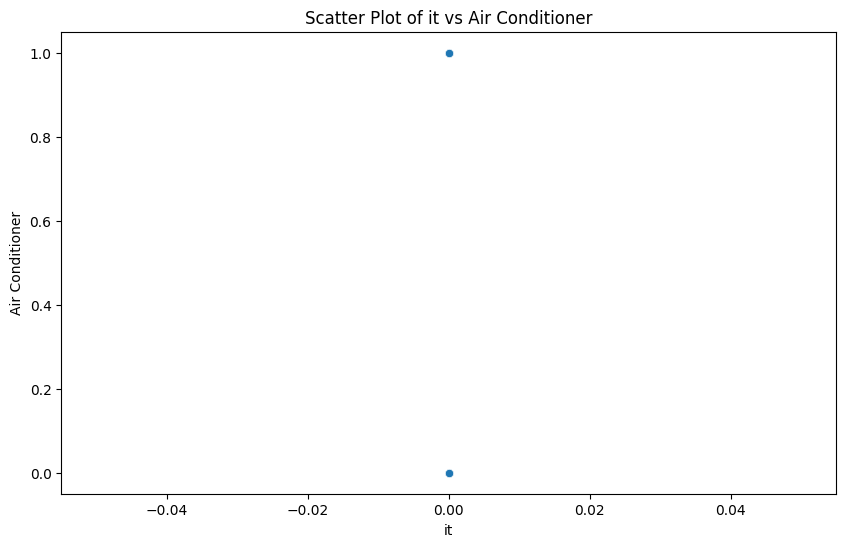

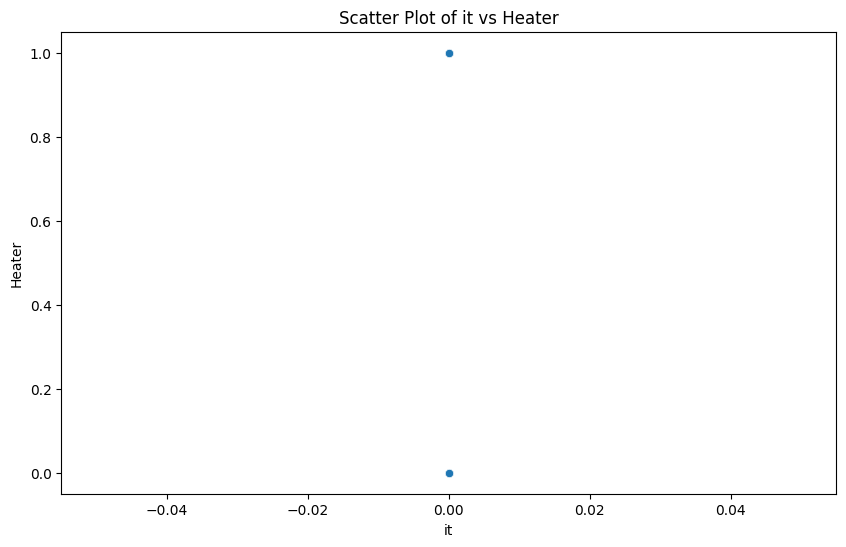

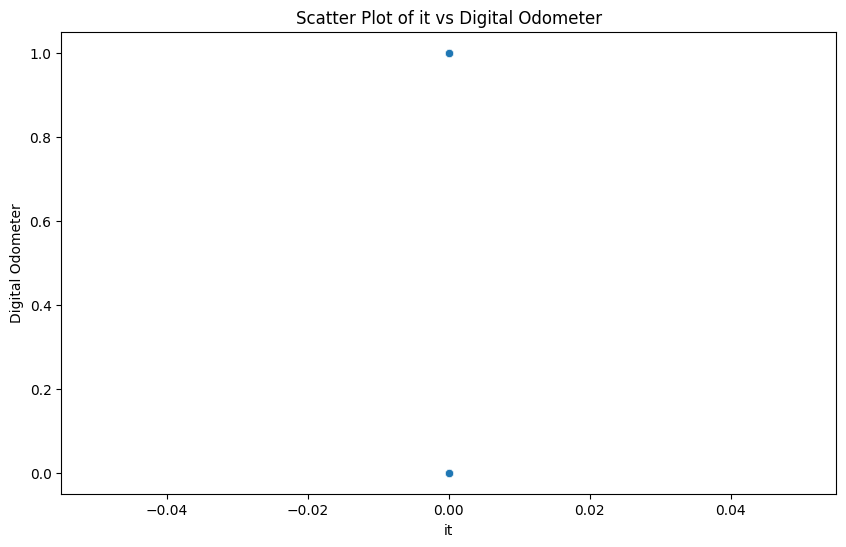

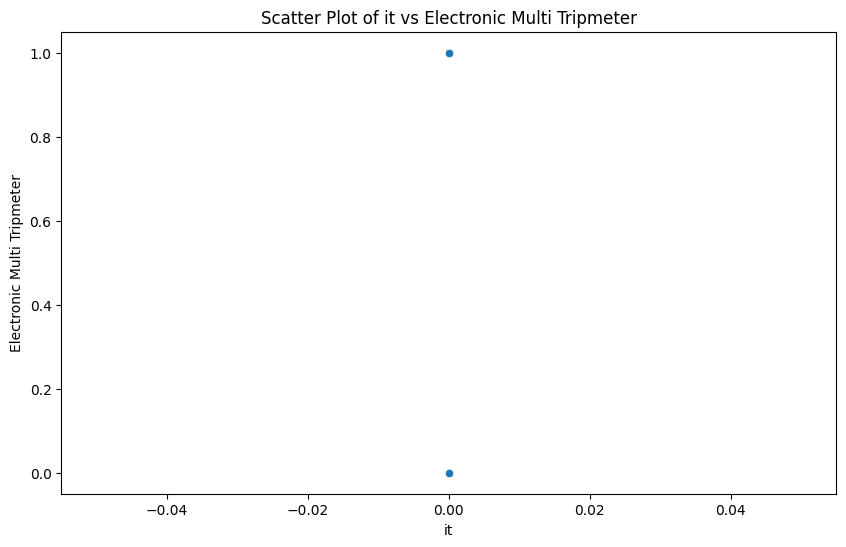

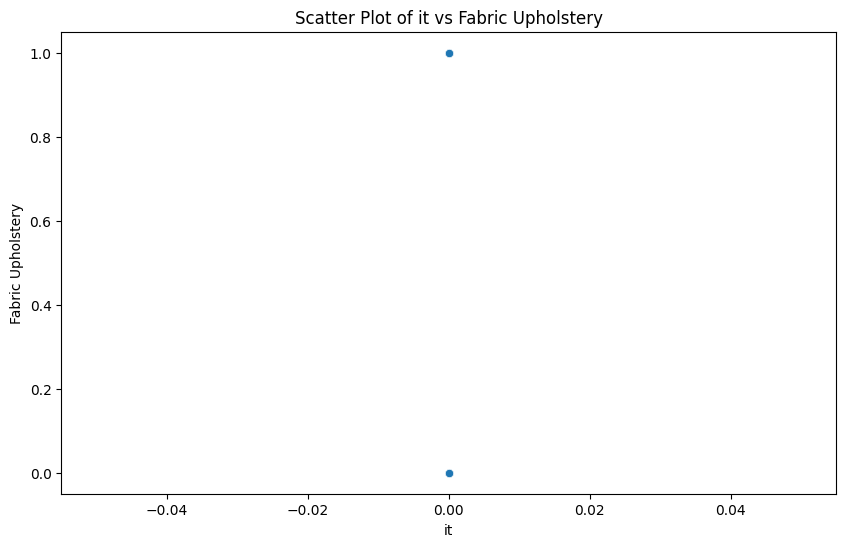

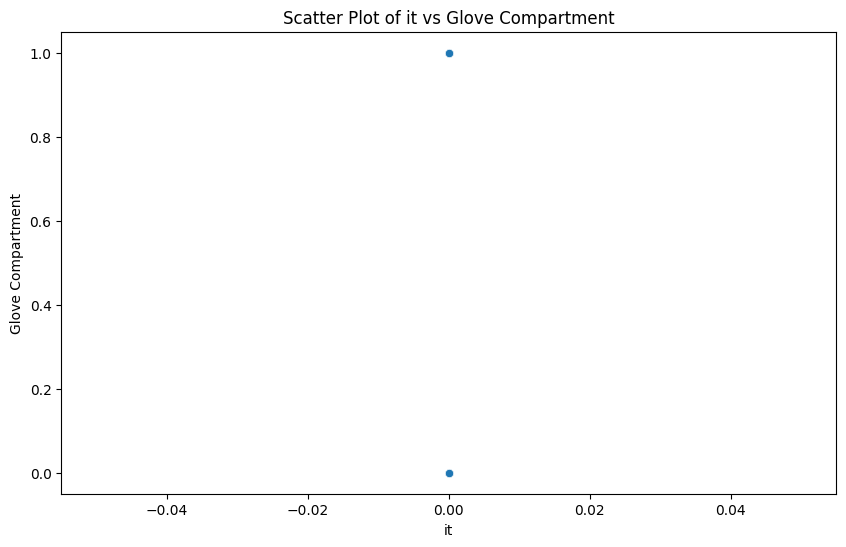

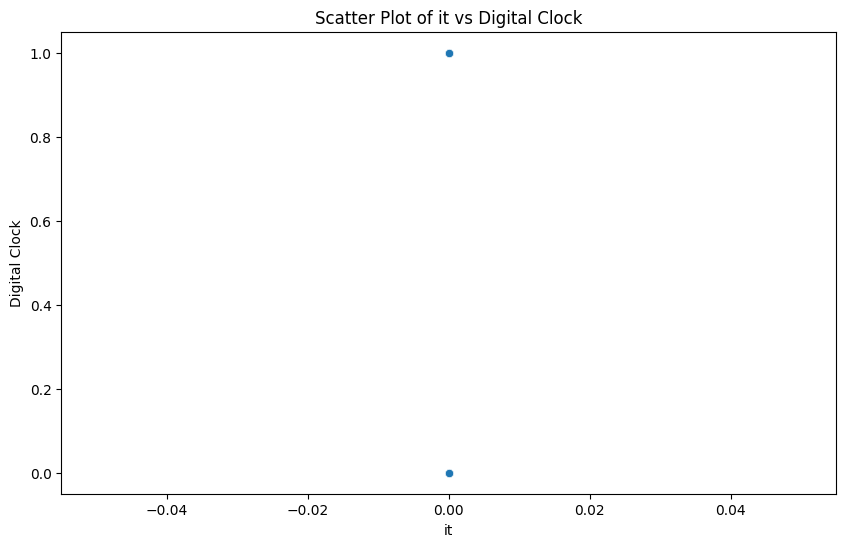

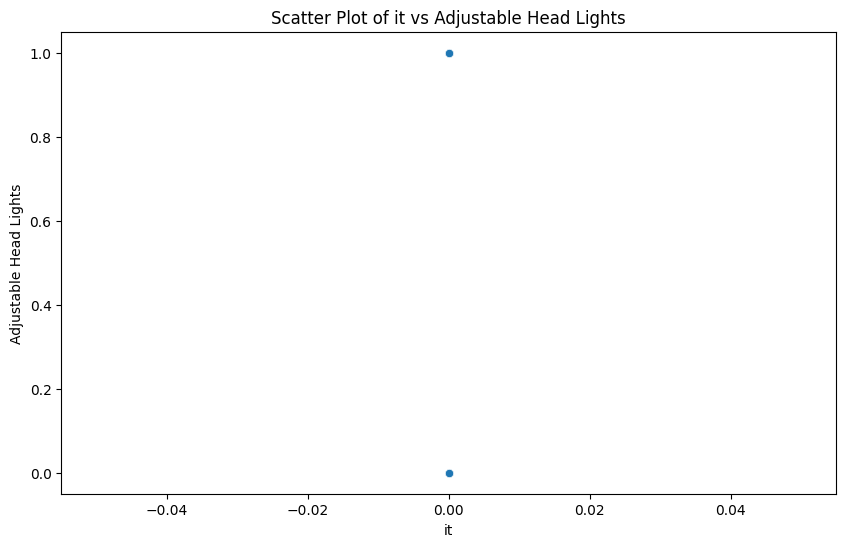

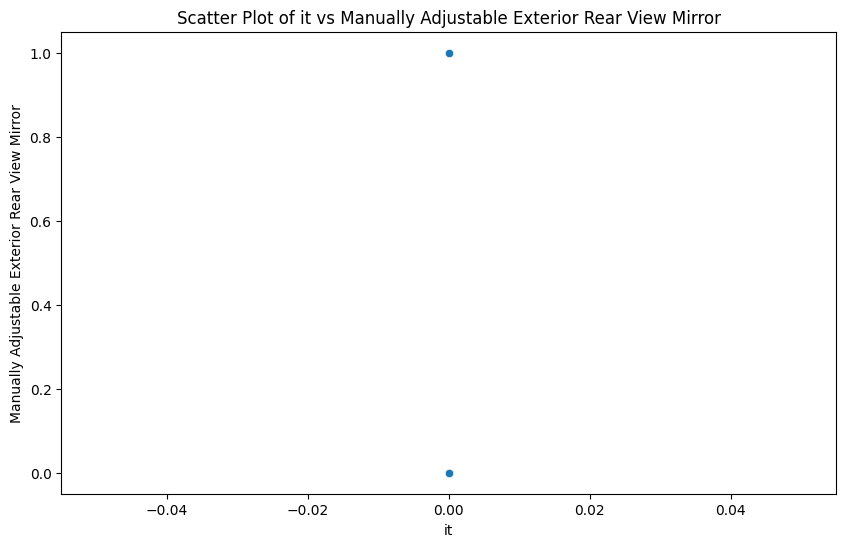

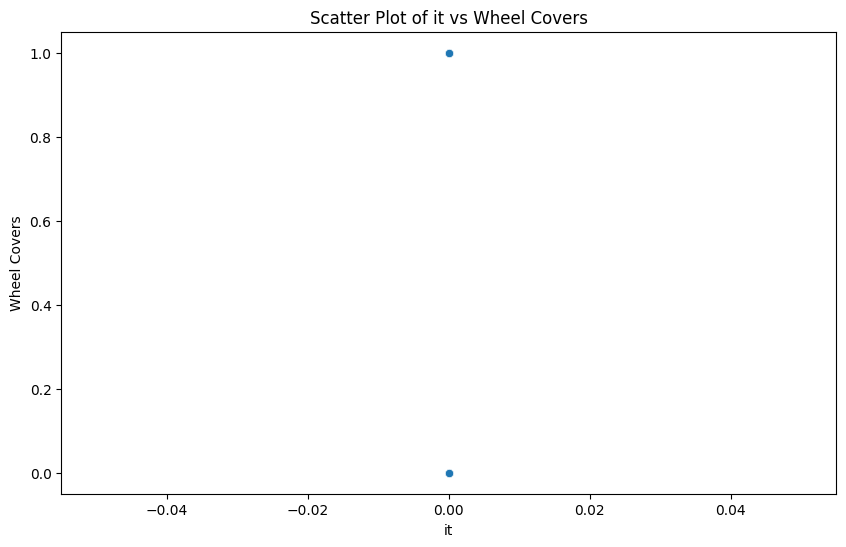

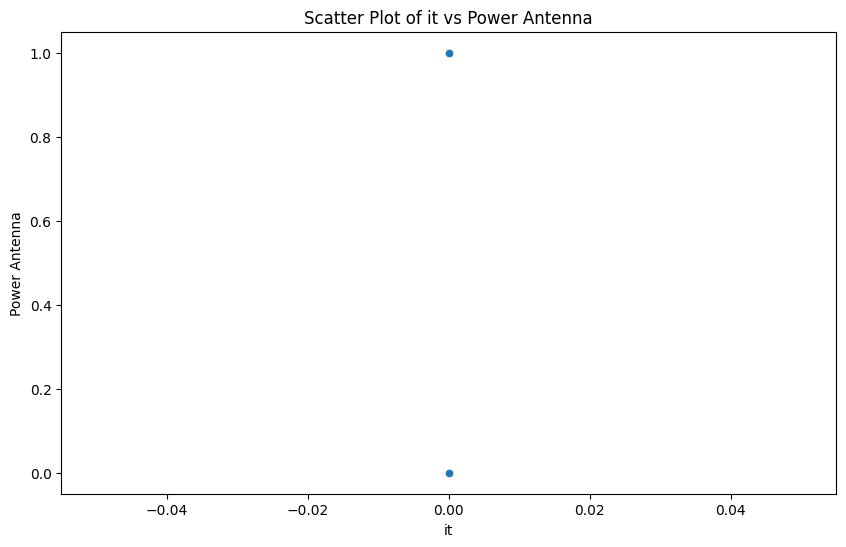

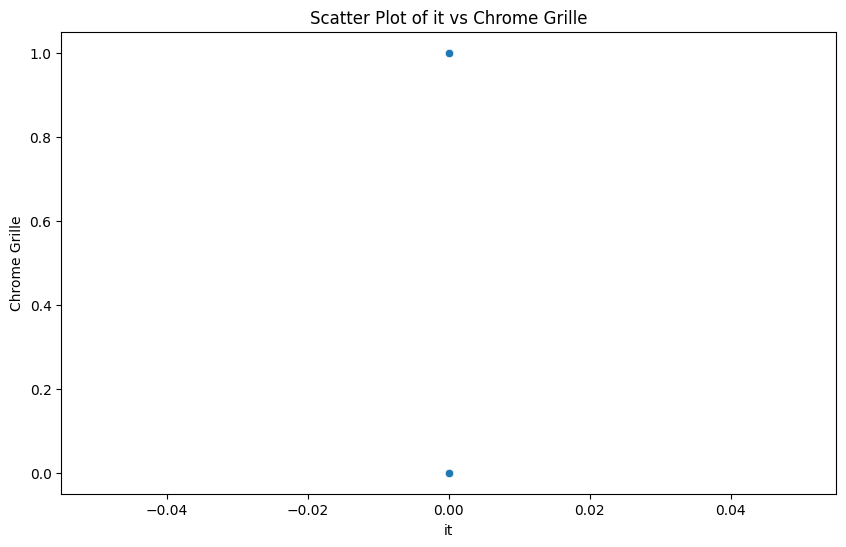

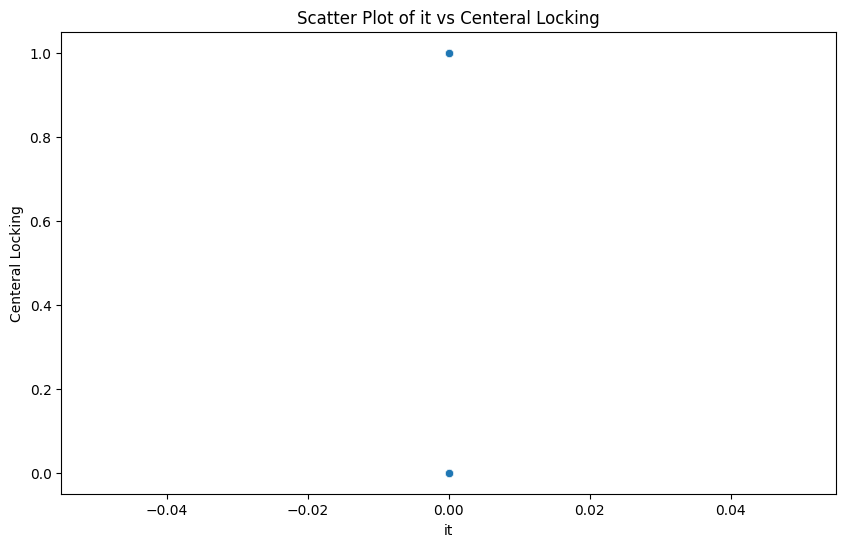

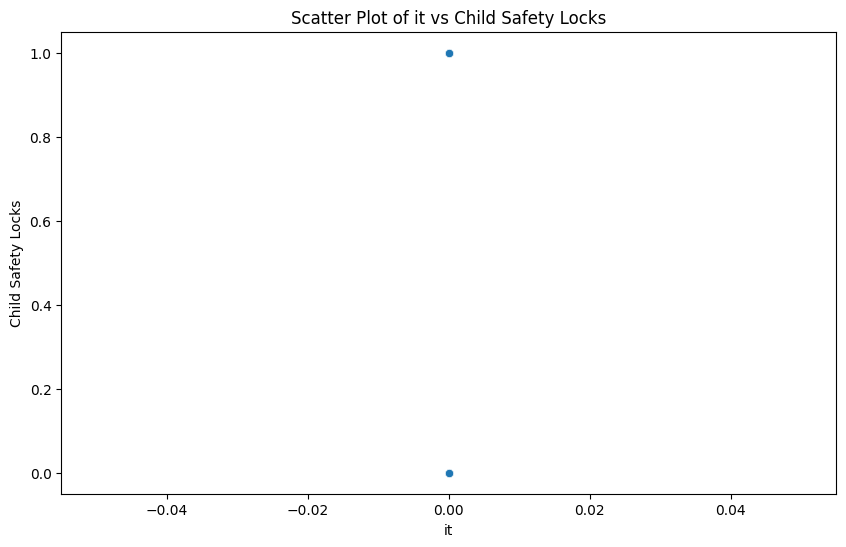

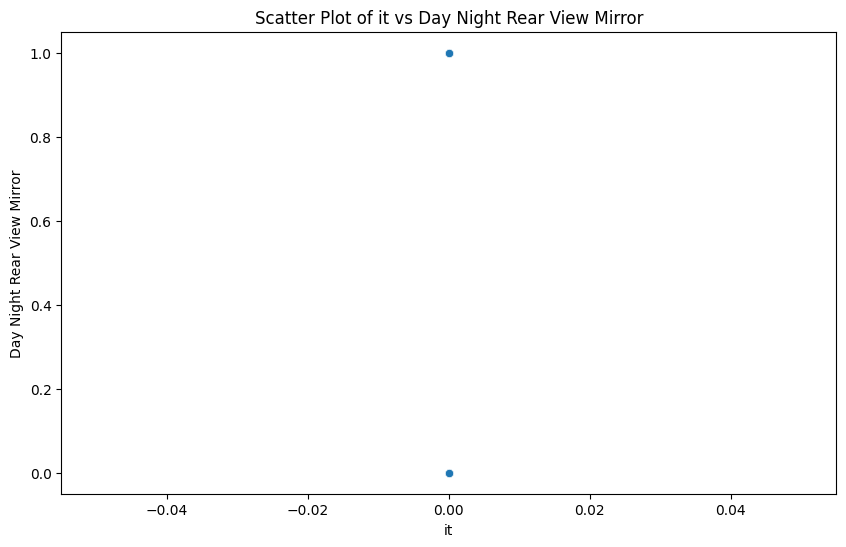

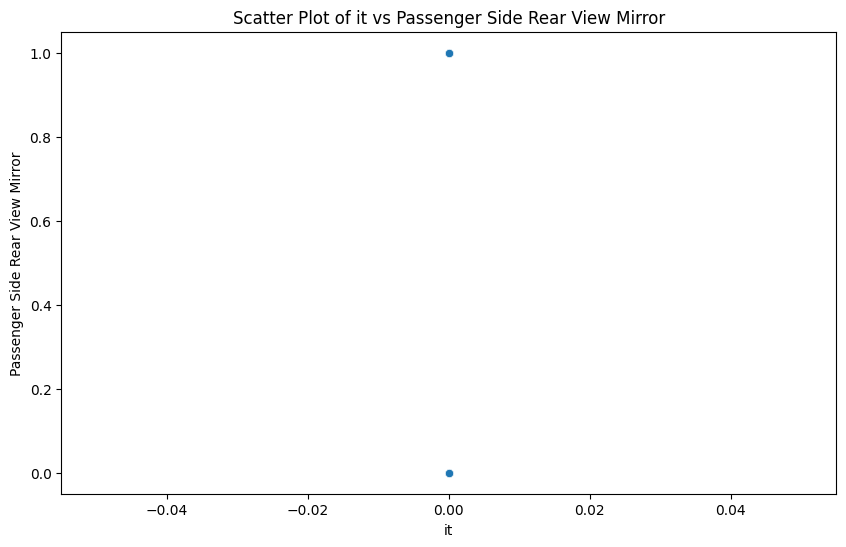

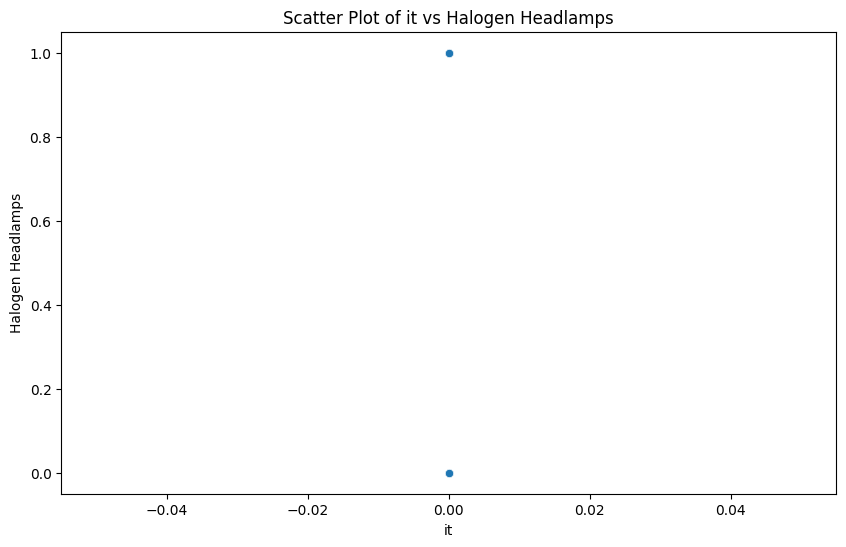

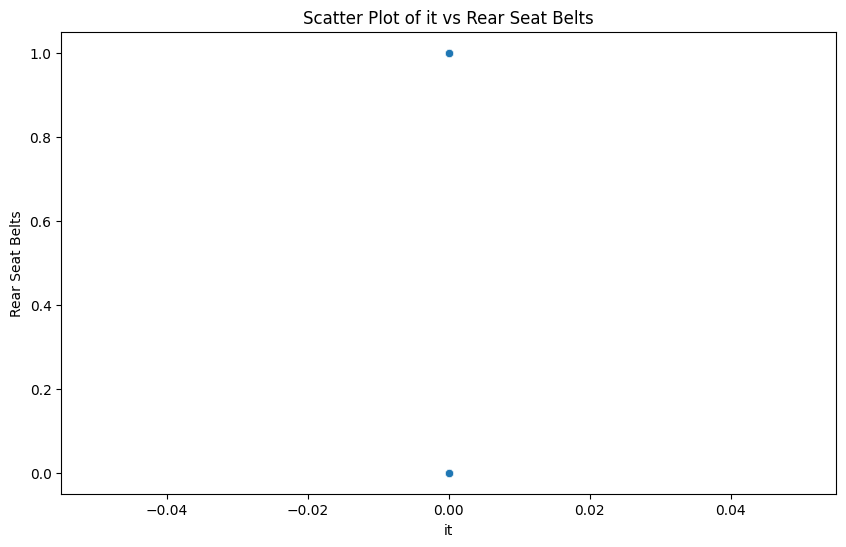

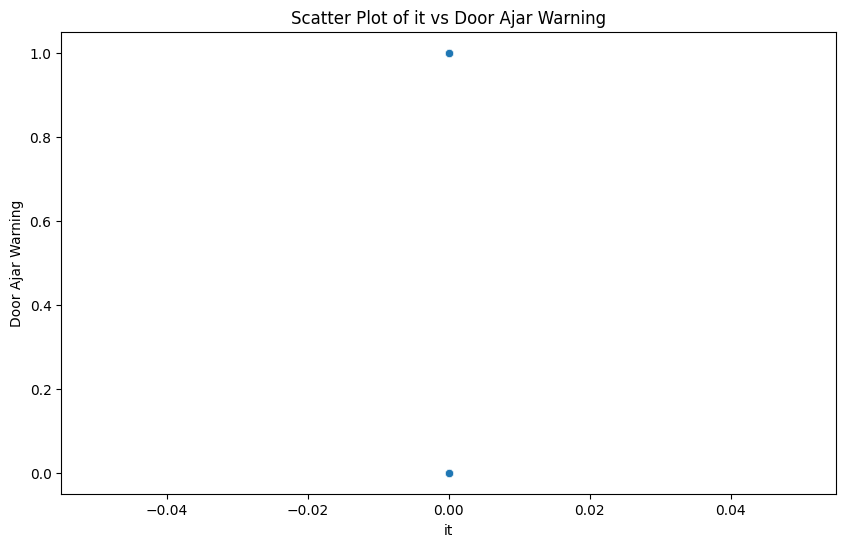

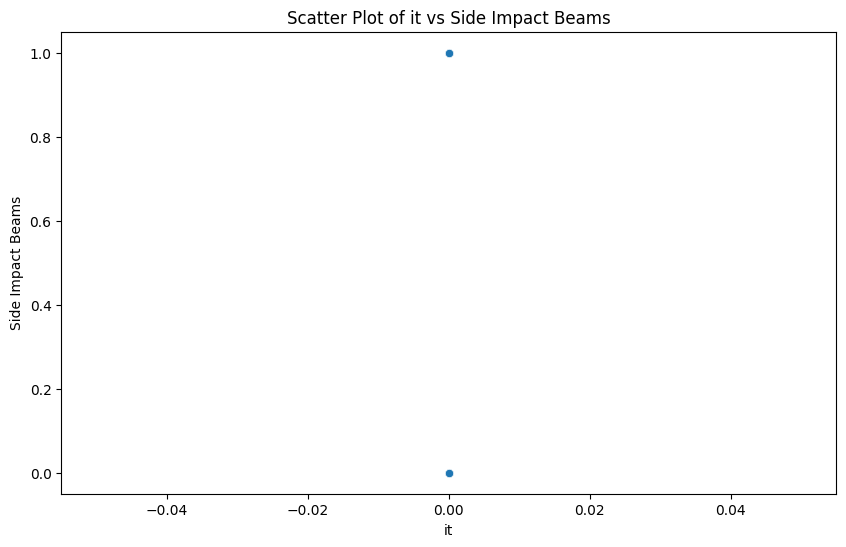

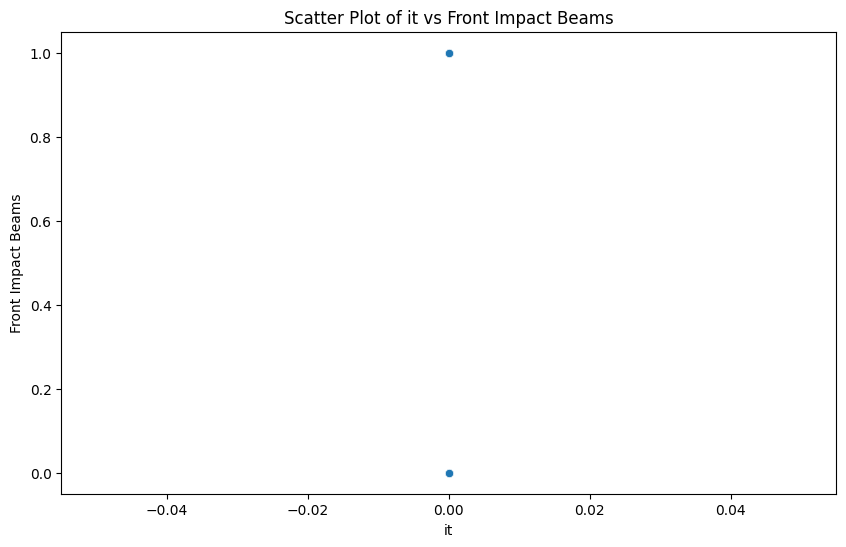

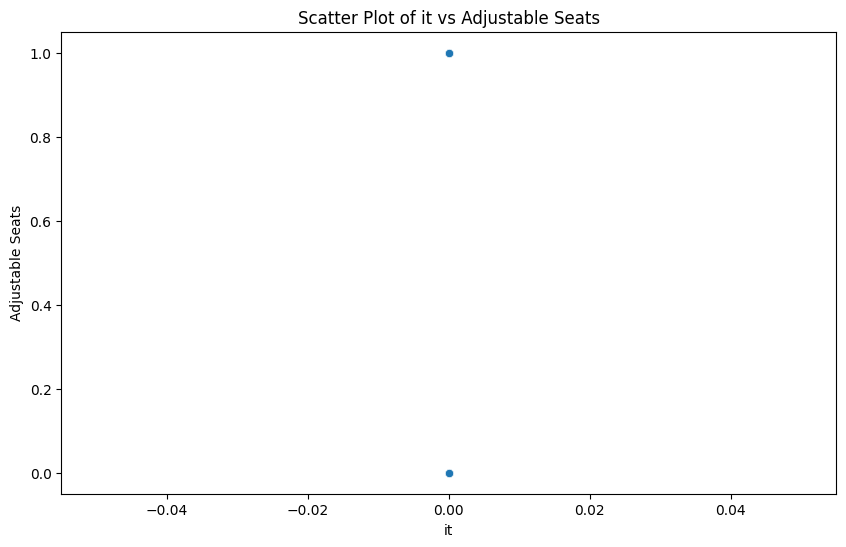

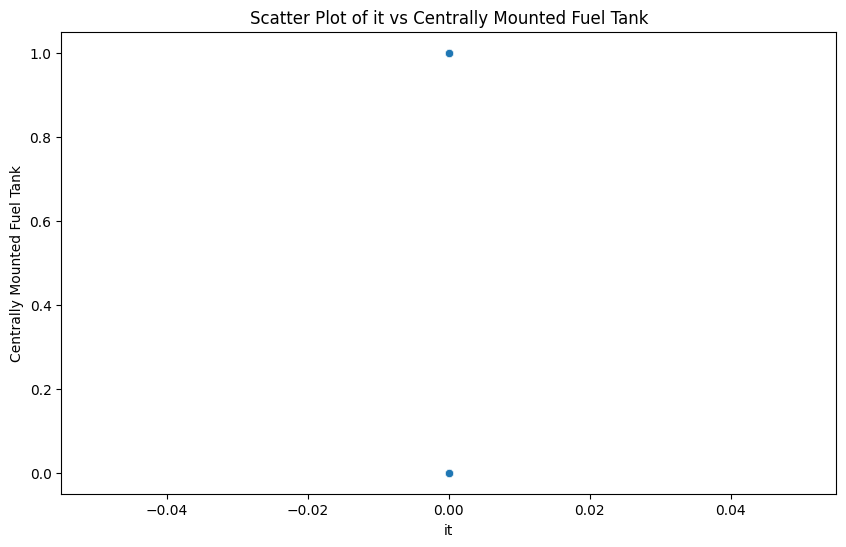

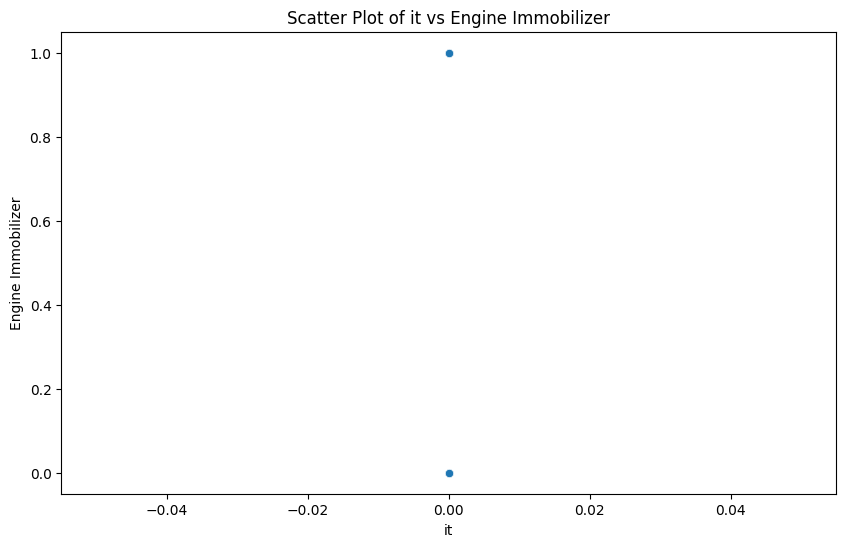

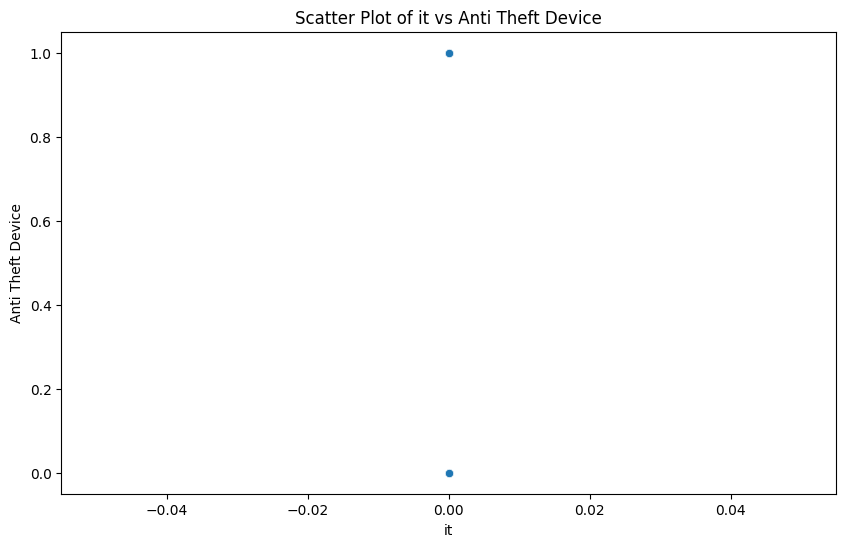

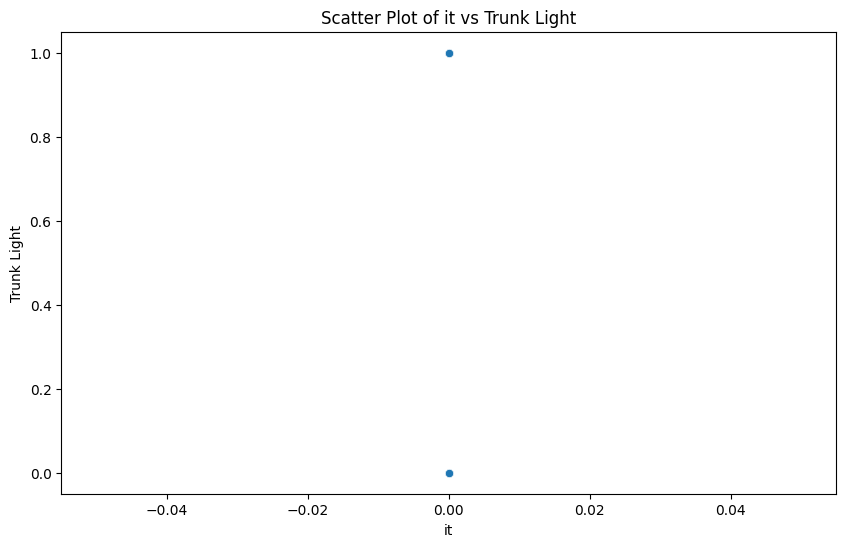

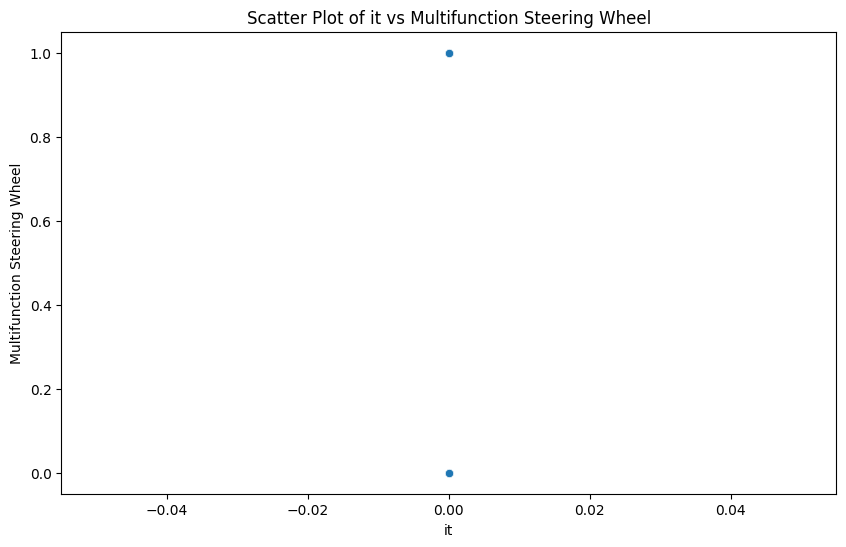

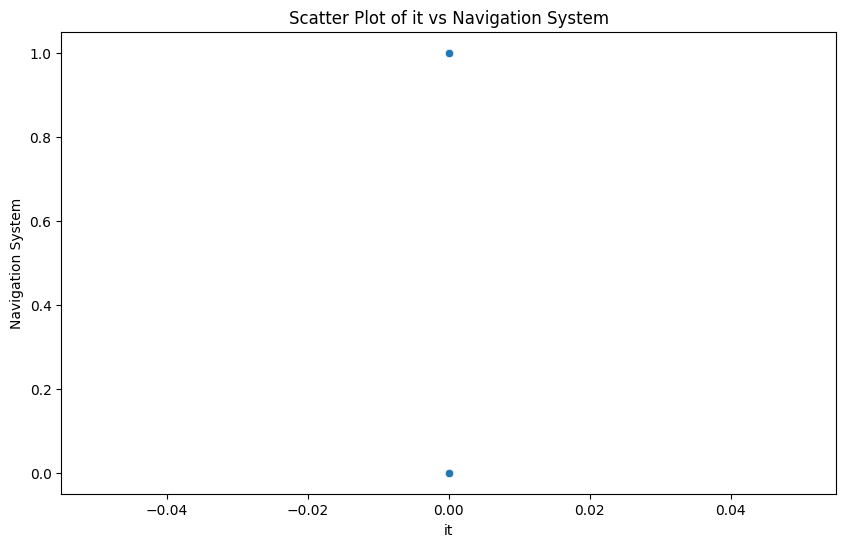

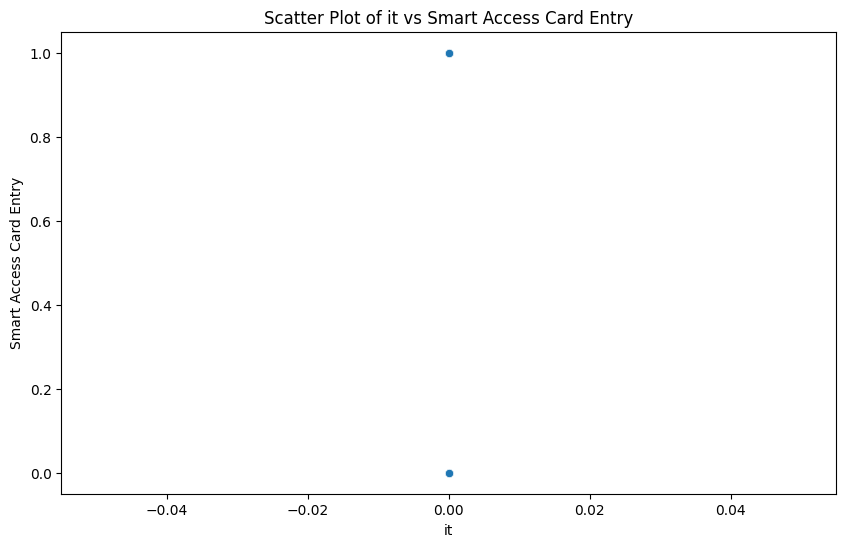

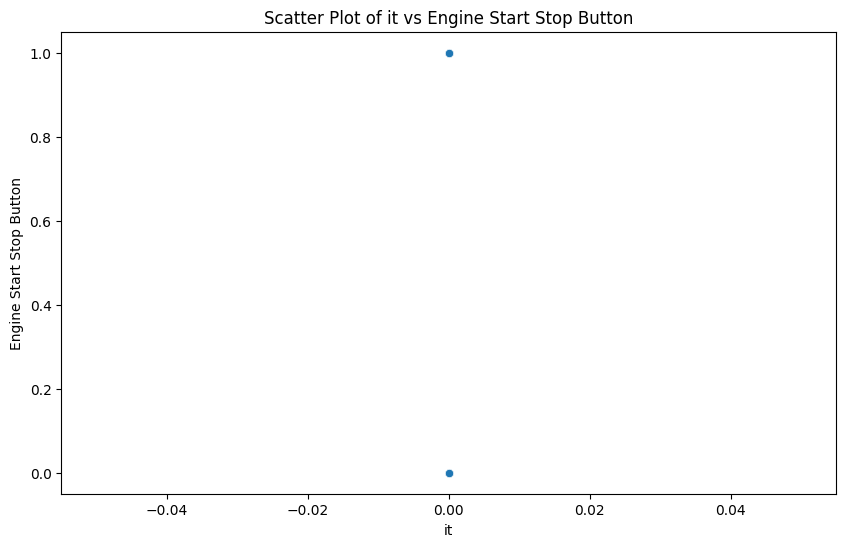

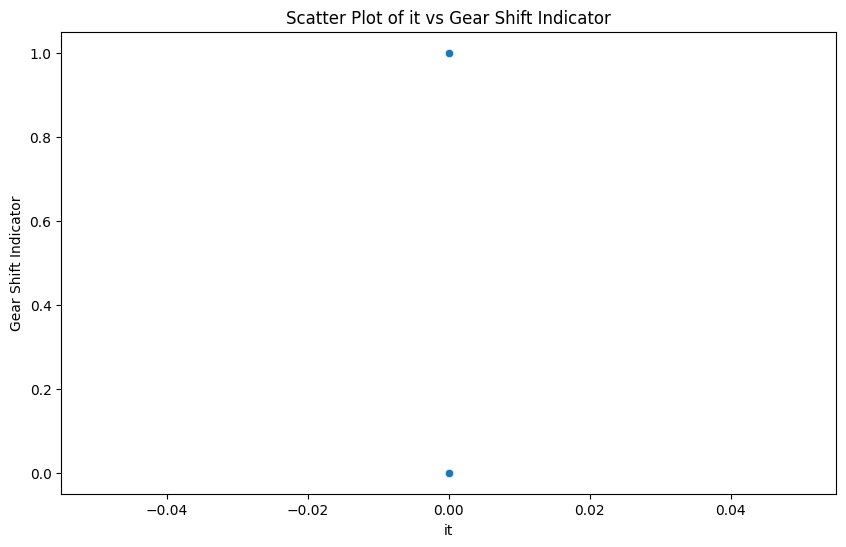

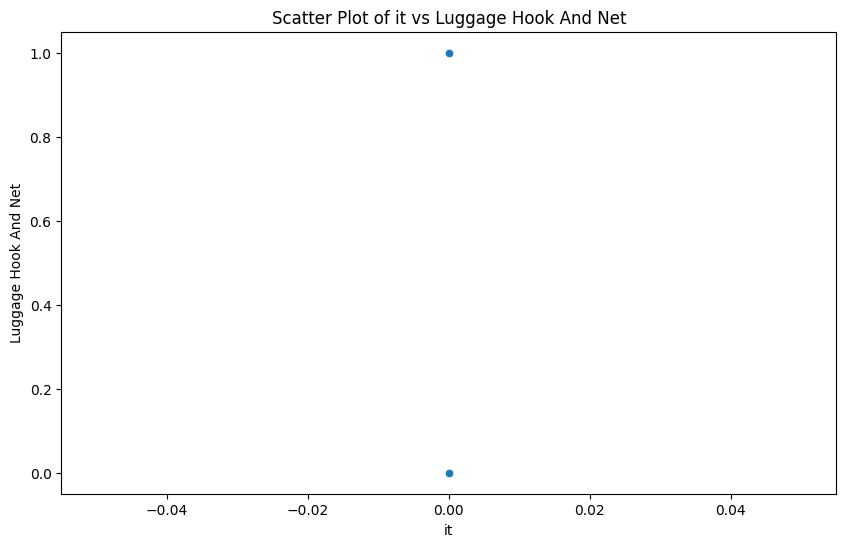

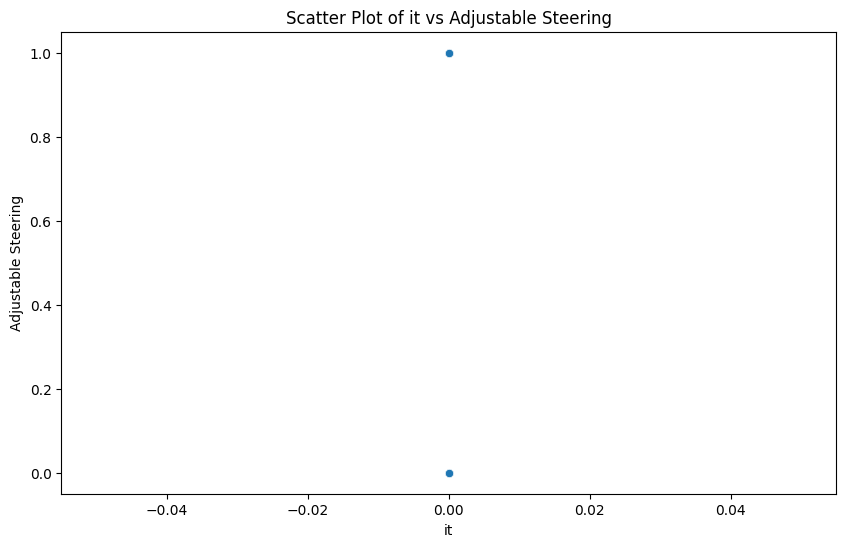

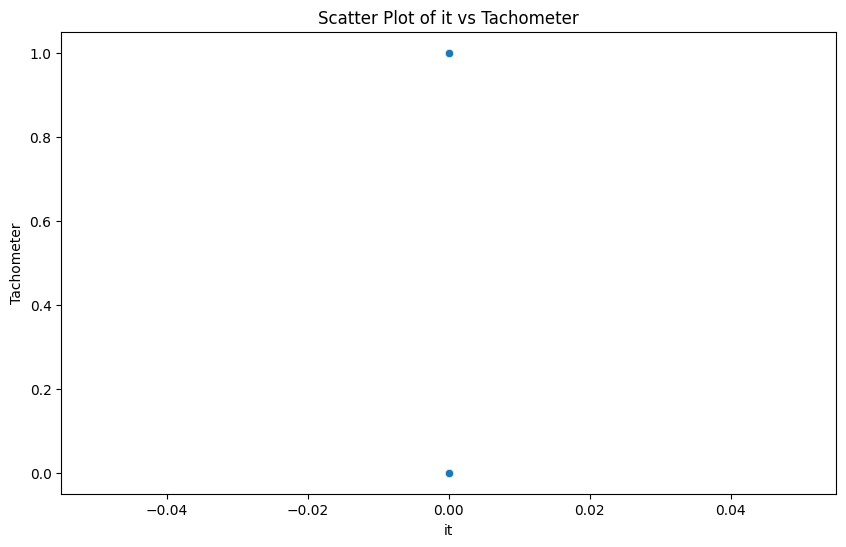

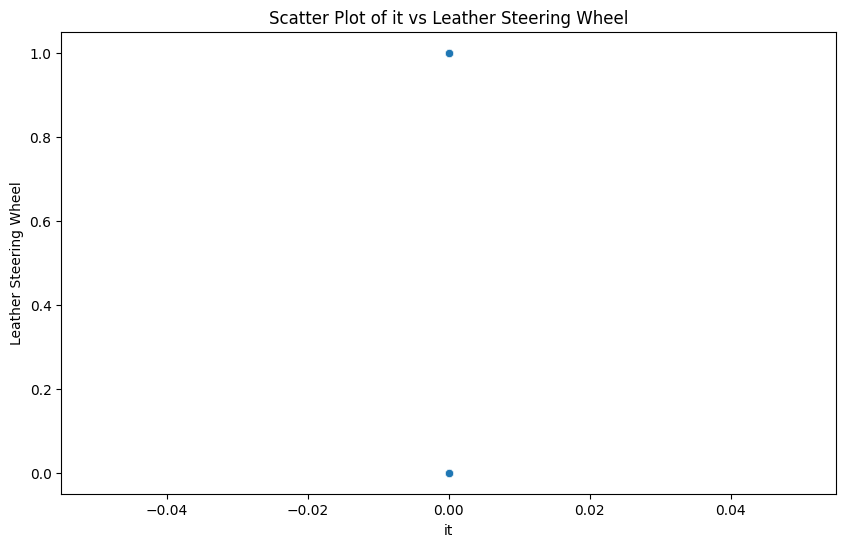

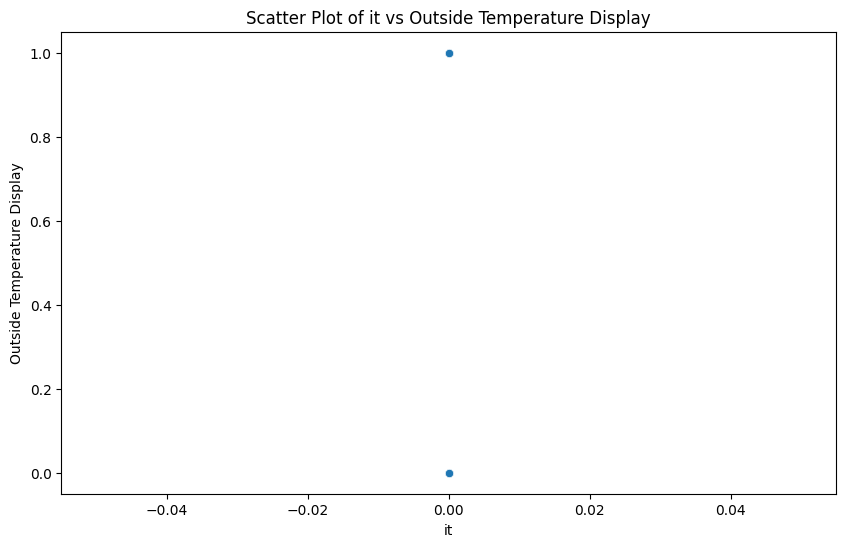

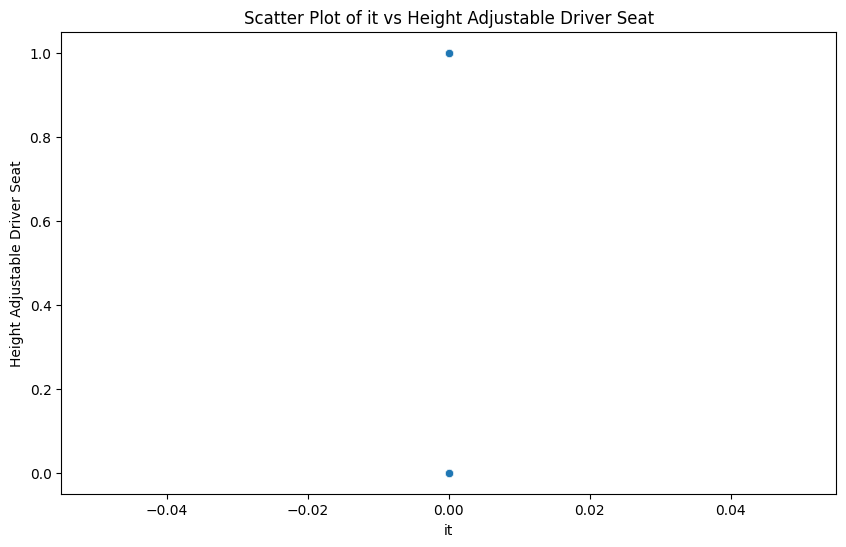

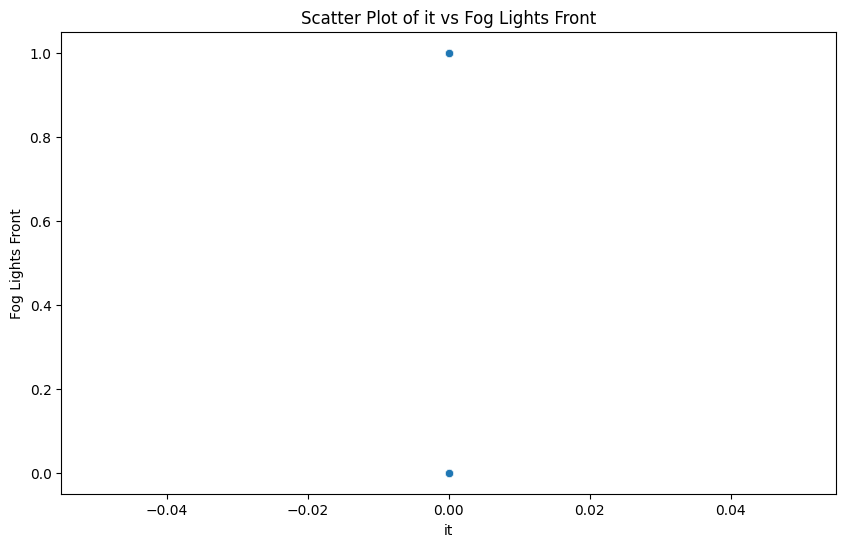

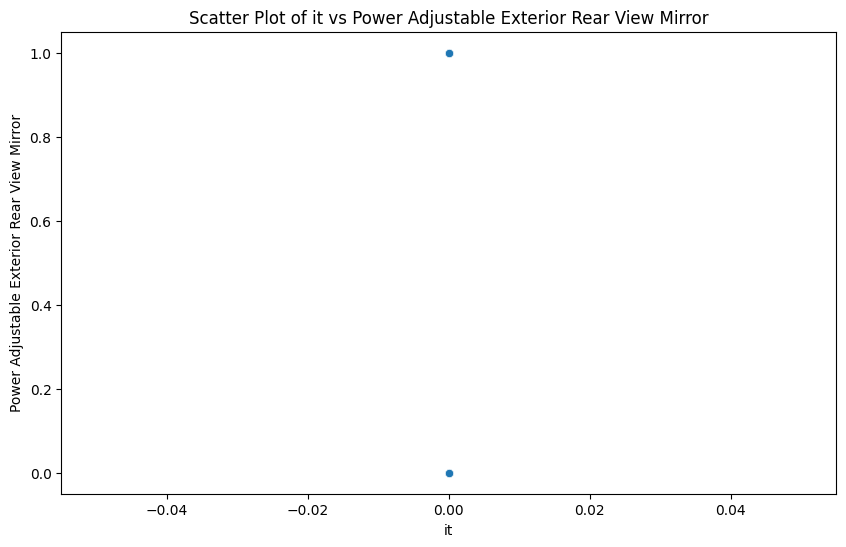

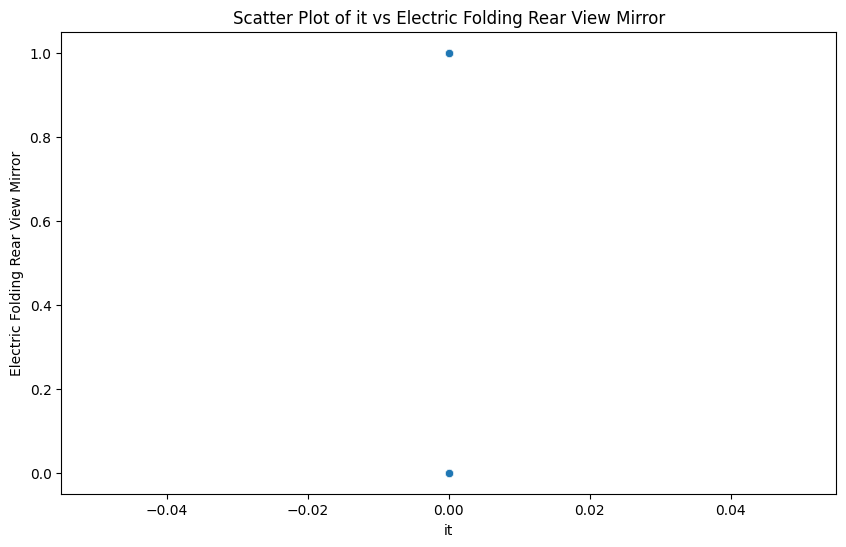

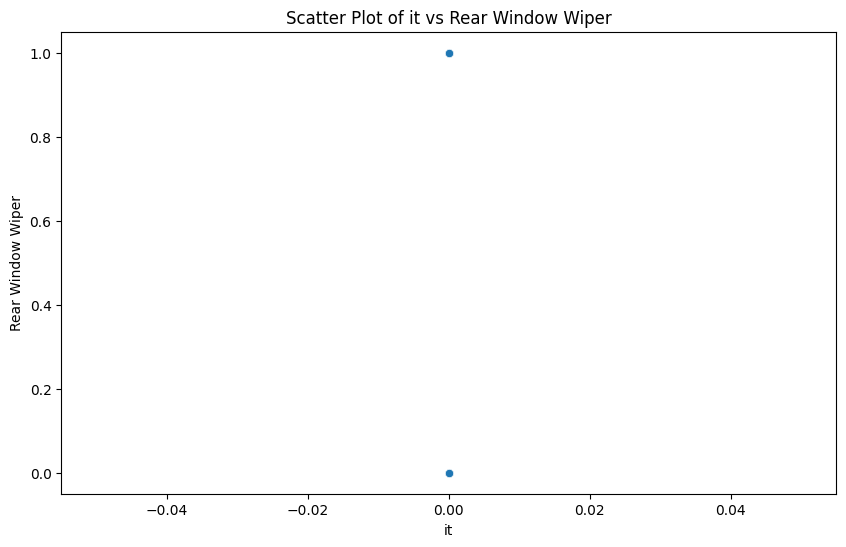

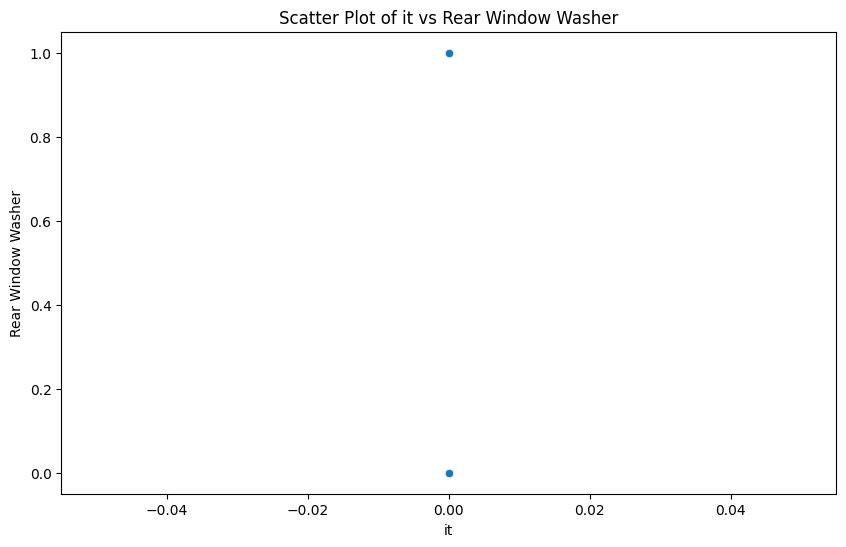

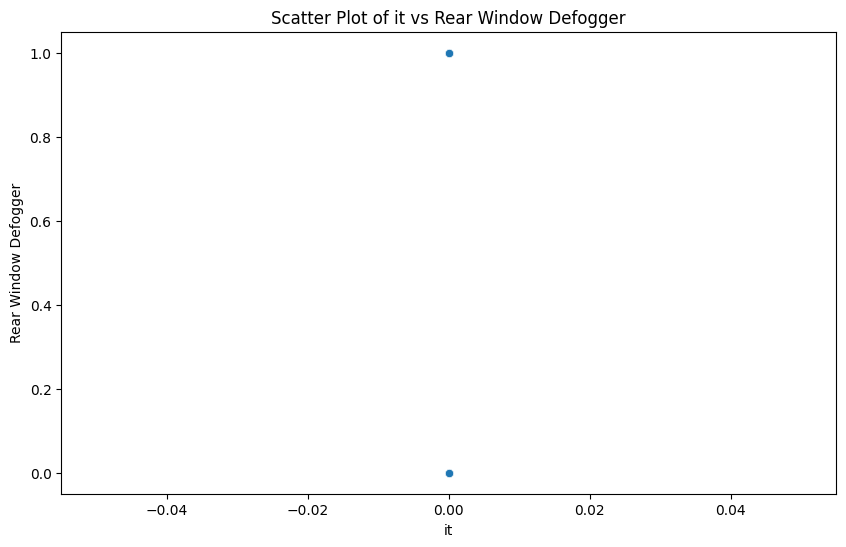

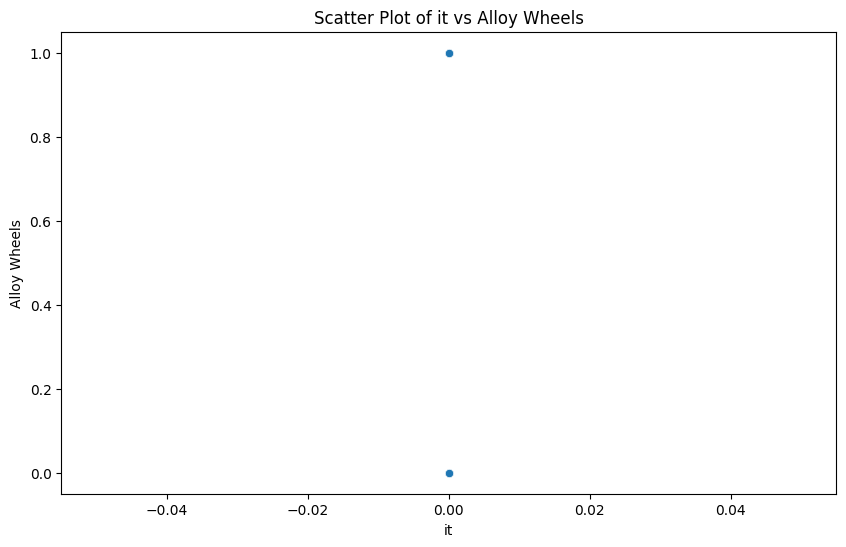

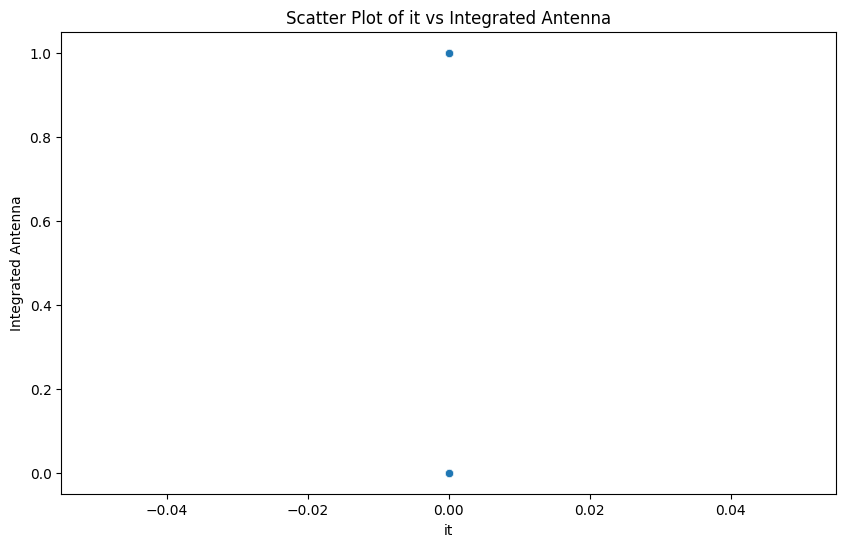

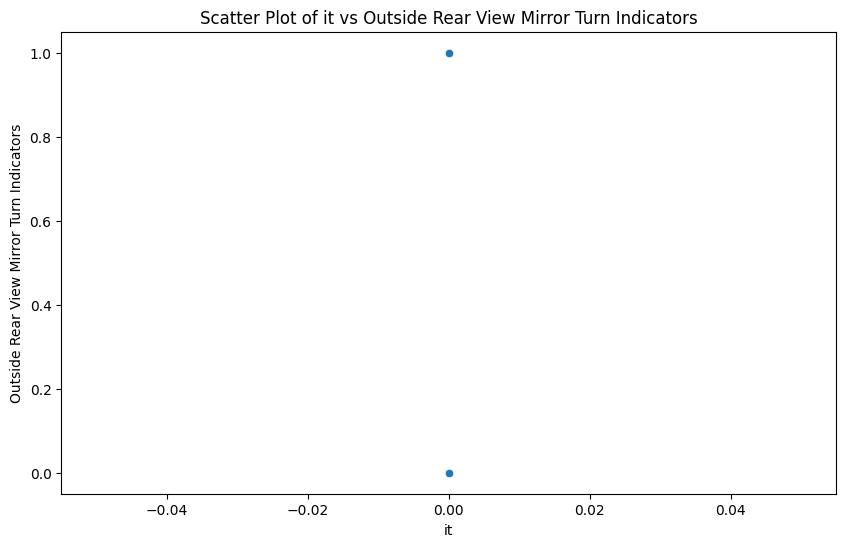

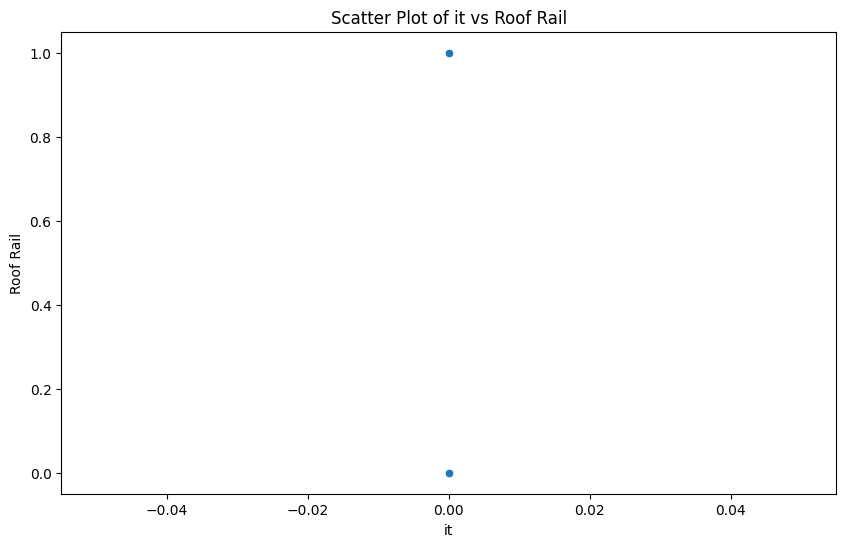

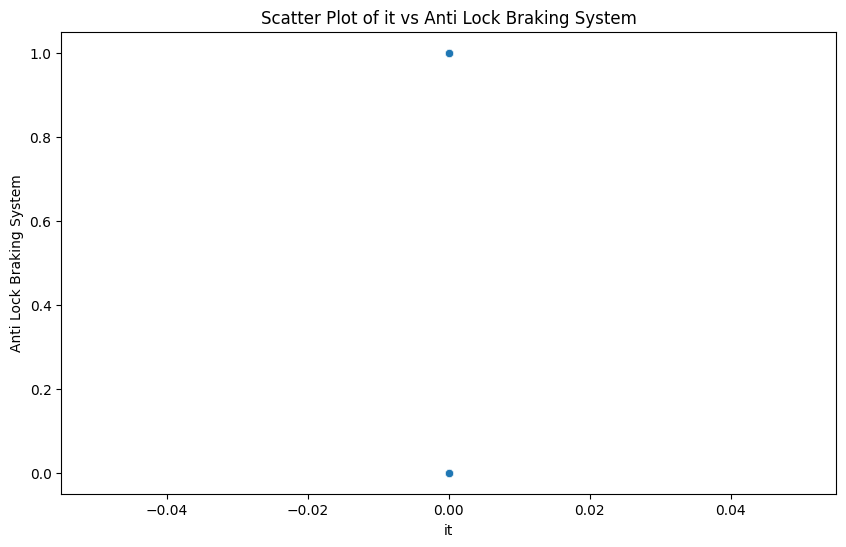

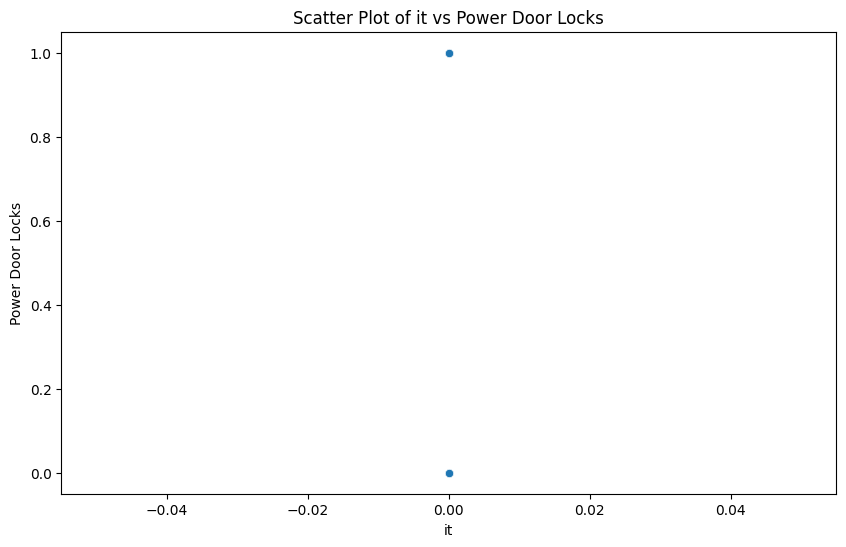

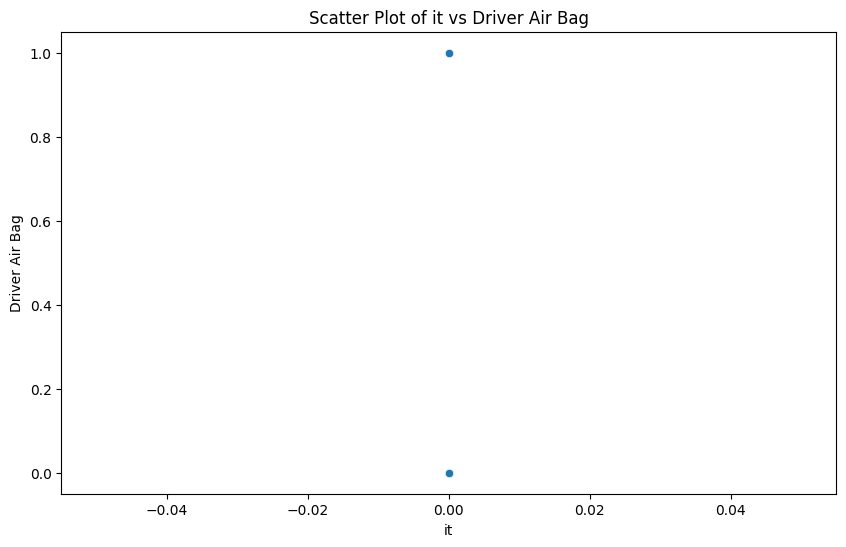

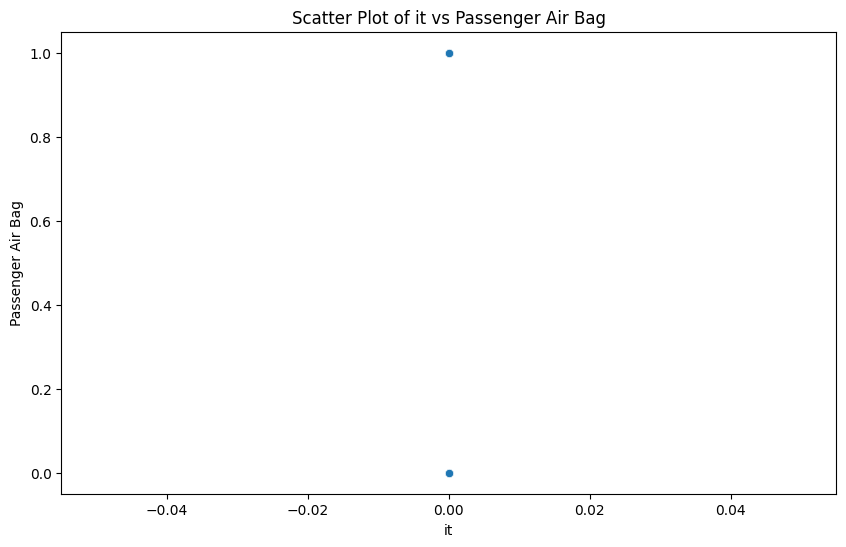

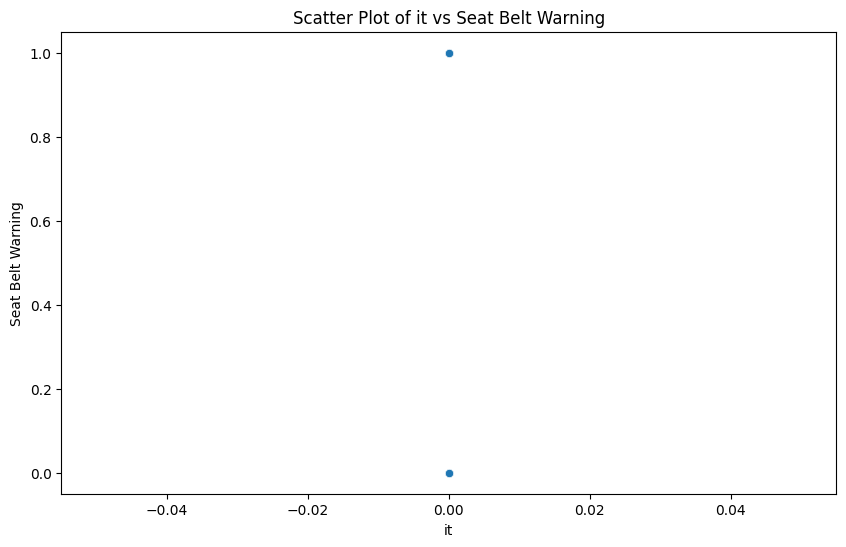

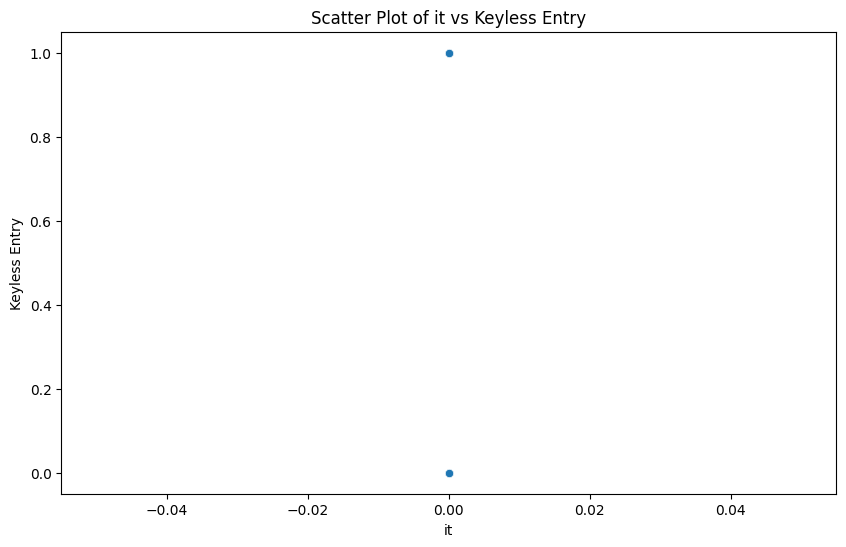

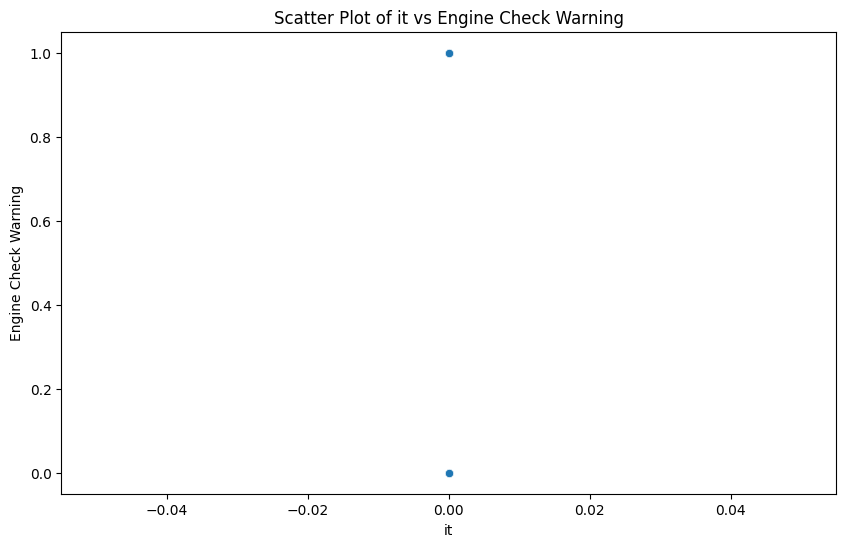

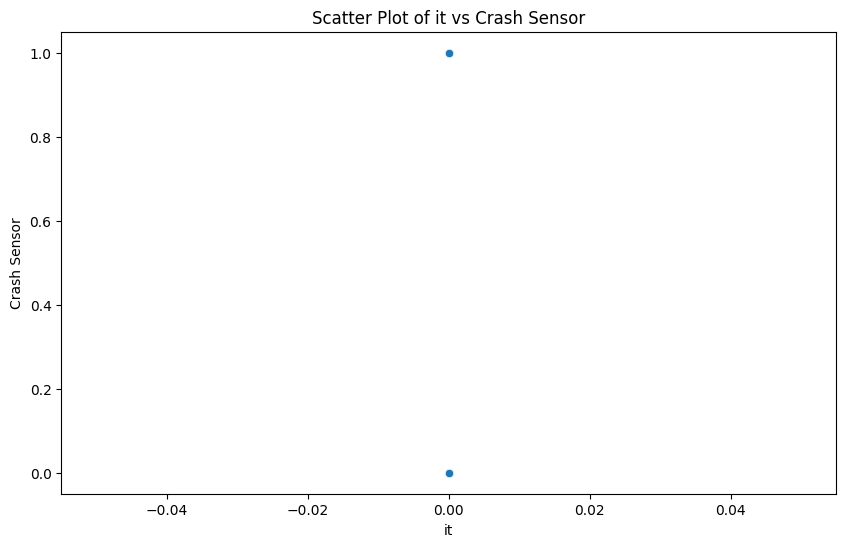

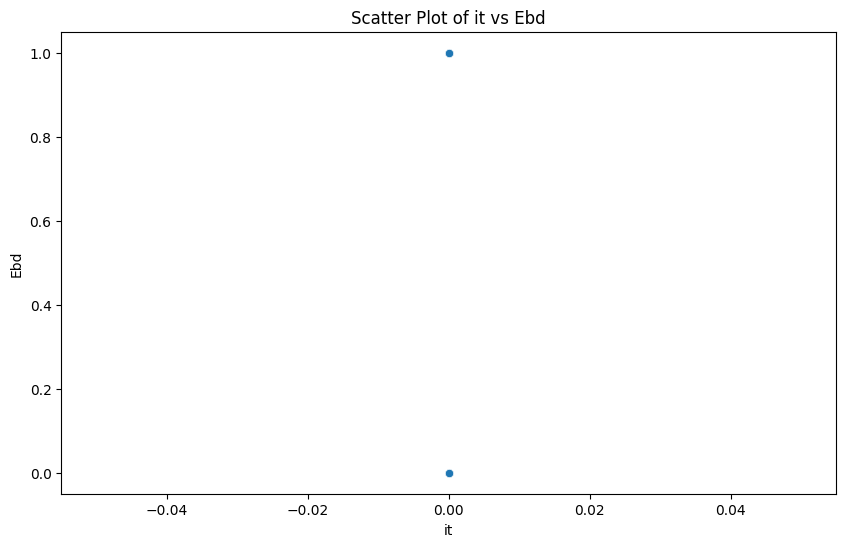

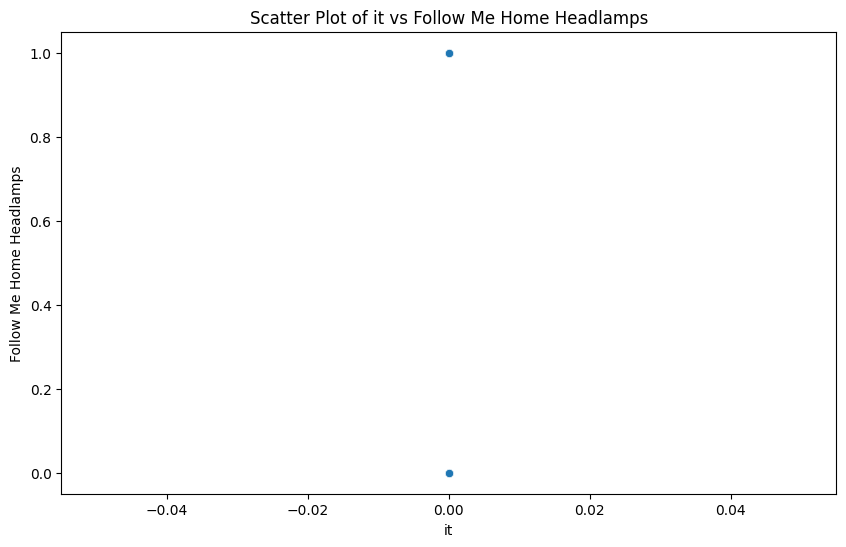

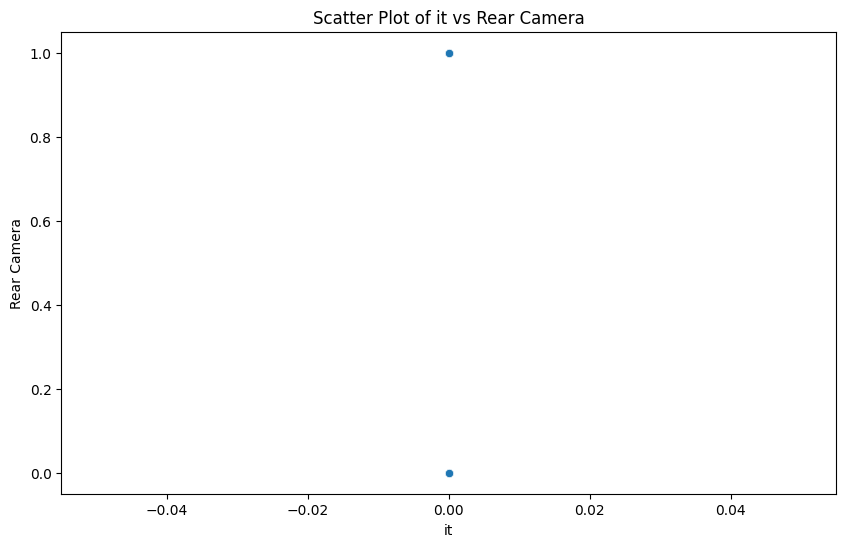

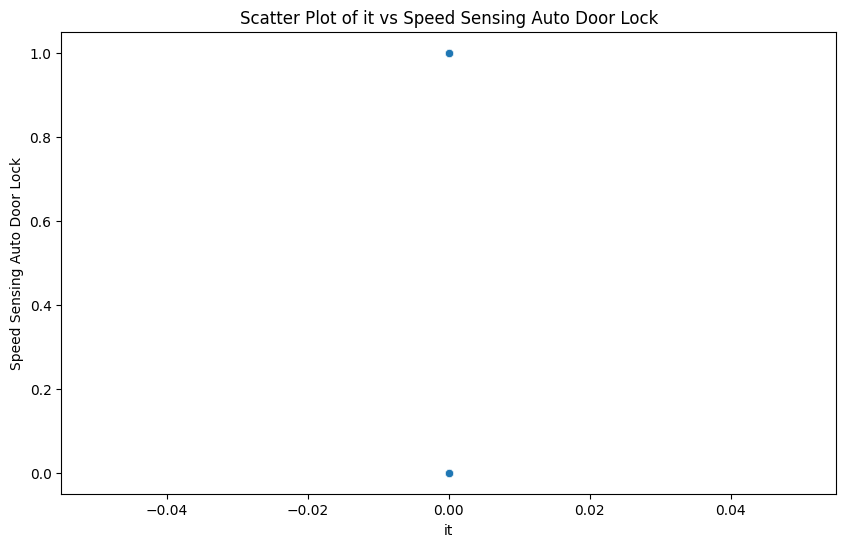

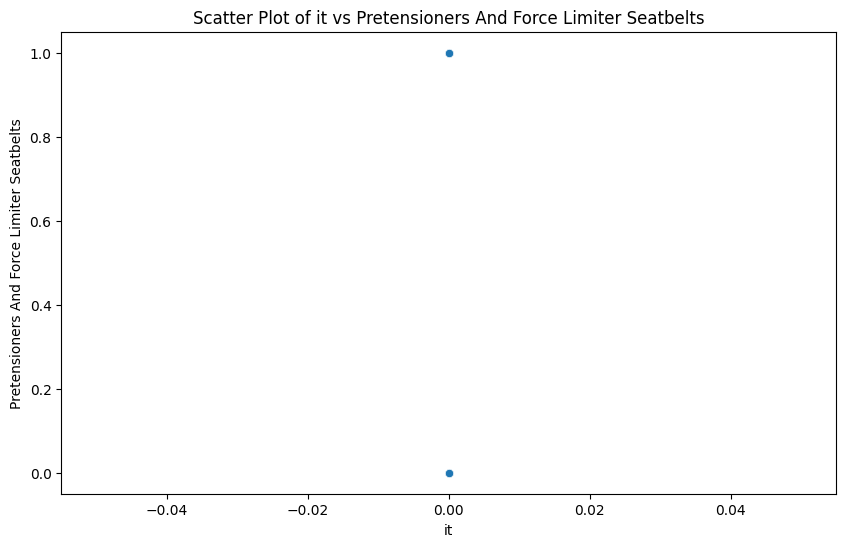

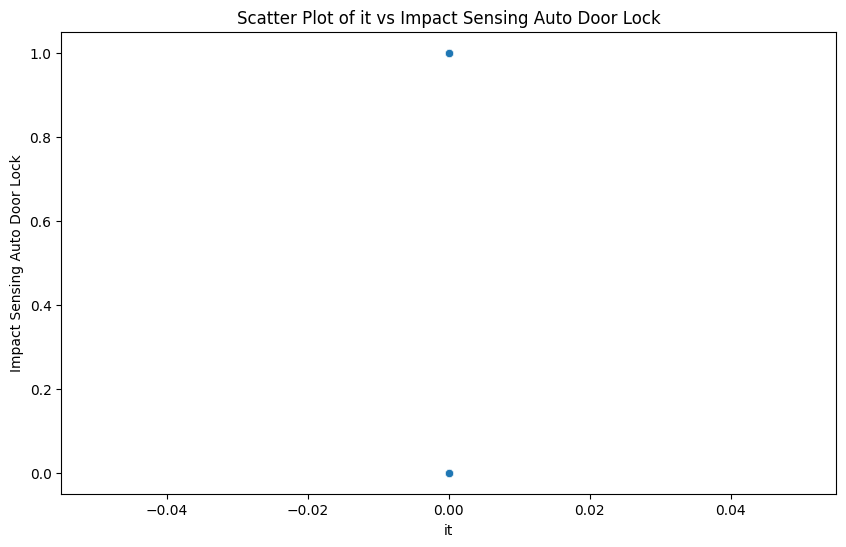

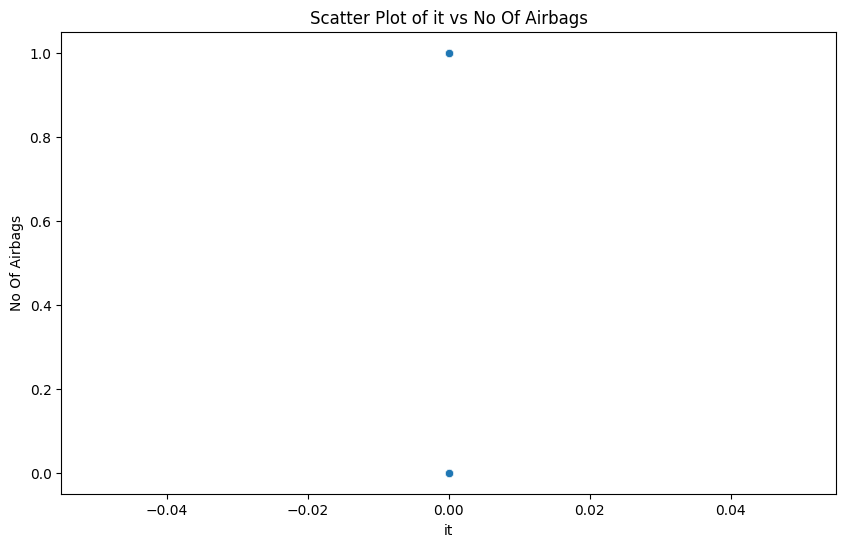

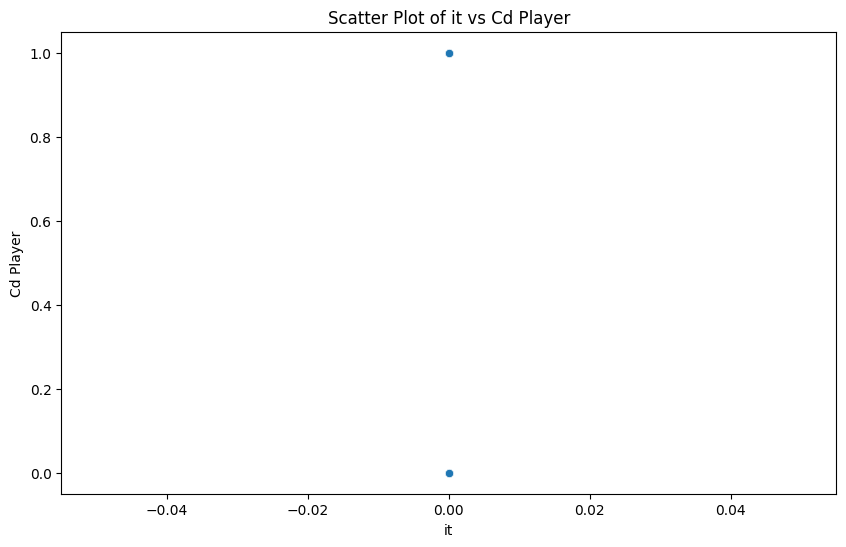

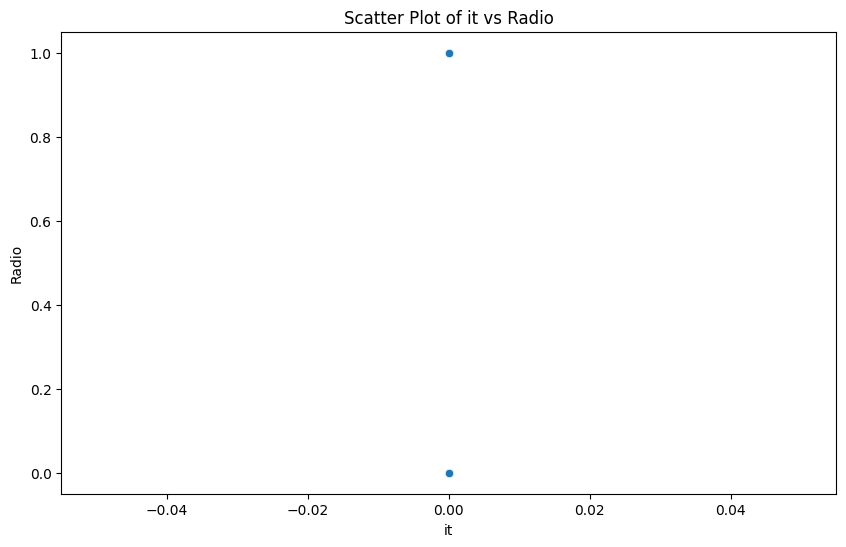

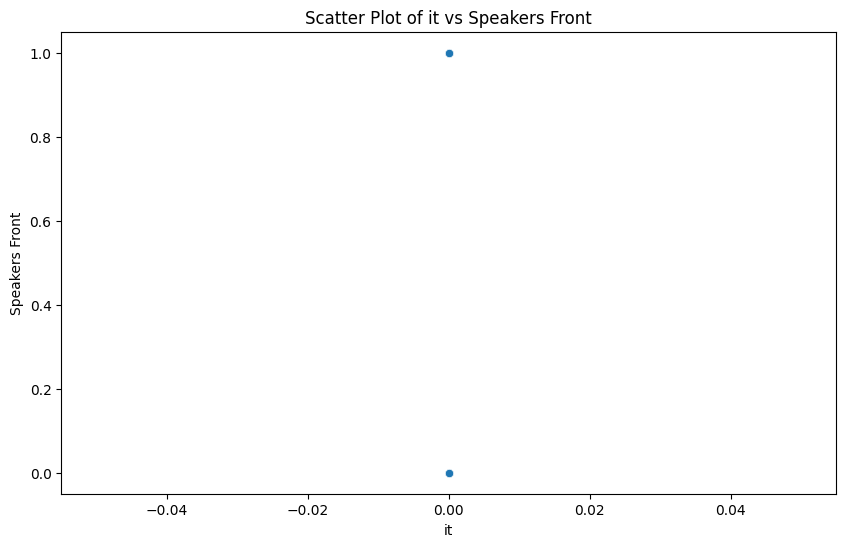

KeyboardInterrupt: 

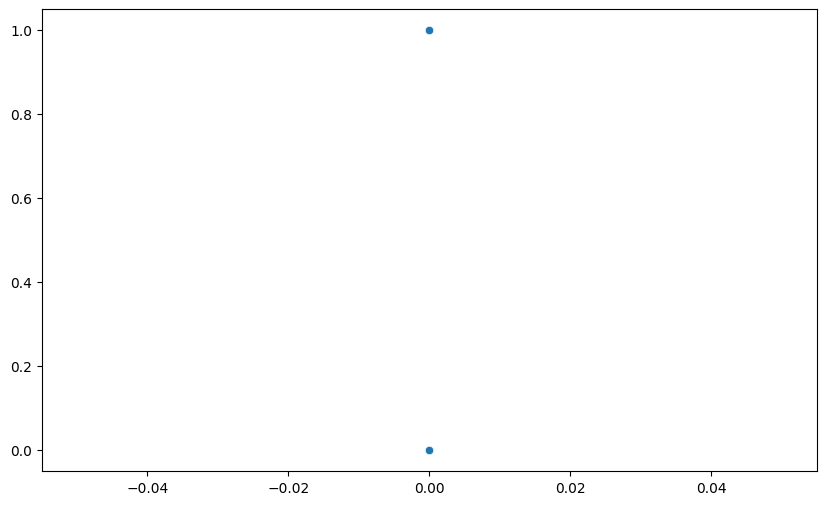

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Create scatter plots for all pairs of numeric columns
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=numeric_columns[i], y=numeric_columns[j])
        plt.title(f'Scatter Plot of {numeric_columns[i]} vs {numeric_columns[j]}')
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.show()

In [ ]:
import pandas as pd

# Assuming your cleaned DataFrame is called 'df'
# Clean your data (this step depends on what specific cleaning you have done)

# Save the cleaned data to a CSV file
df.to_csv('cleaned_data.csv', index=False)

# 'index=False' means the index column (row numbers) won't be saved in the CSV file.


### Price Prediction Techniques

In [ ]:
import pandas as pd

# Sample DataFrame
# df = pd.read_csv('your_data.csv')

# Initialize a dictionary to store summary statistics for each column
summary_stats = {}

# Iterate through each numeric column
for column in df.select_dtypes(include=['number']).columns:
    data = df[column]
    
    # Handle missing values
    data_cleaned = data.dropna()
    
    # Calculate statistics
    mean_value = data_cleaned.mean()
    median_value = data_cleaned.median()
    mode_value = data_cleaned.mode().tolist()
    std_dev = data_cleaned.std()
    variance = data_cleaned.var()
    
    # Store statistics in the dictionary
    summary_stats[column] = {
        'Mean': mean_value,
        'Median': median_value,
        'Mode': mode_value,
        'Standard Deviation': std_dev,
        'Variance': variance
    }

# Convert the summary statistics dictionary to a DataFrame for better readability
summary_df = pd.DataFrame(summary_stats).T

print(summary_df)


In [ ]:
import pandas as pd

# Load the preprocessed dataset
df = pd.read_csv('Cleaned_data.csv')  # Ensure the file extension is correct

# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Compute correlation of each feature with the target variable
correlation_with_target = X.corrwith(y).abs()

# Define a function to select features based on correlation with the target variable
def select_features_by_correlation(correlation_with_target, threshold):
    relevant_features = correlation_with_target[correlation_with_target > threshold].index.tolist()
    return relevant_features

# Set the correlation threshold
correlation_threshold = 0.1

# Select features based on the correlation threshold
selected_features = select_features_by_correlation(correlation_with_target, correlation_threshold)

# Include 'price' in the output to save as well
selected_features.append('price')

# Create a DataFrame with selected features
X_selected = df[selected_features]

# Save the selected features to a new CSV file
X_selected.to_csv(r"C:\Users\plangote\used_car_price_prediction_processed_dataset.csv", index=False)

# Print the selected features
print("Selected Features:", selected_features)


C:\Users\kiran\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\kiran\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Selected Features: ['ownerNo', 'modelYear', 'centralVariantId', 'priceActual', 'Engine Displacement', 'Power Windows Front', 'Power Windows Rear', 'Accessory Power Outlet', 'Vanity Mirror', 'Digital Odometer', 'Fabric Upholstery', 'Digital Clock', 'Adjustable Head Lights', 'Manually Adjustable Exterior Rear View Mirror', 'Chrome Grille', 'Centeral Locking', 'Child Safety Locks', 'Passenger Side Rear View Mirror', 'Door Ajar Warning', 'Front Impact Beams', 'Centrally Mounted Fuel Tank', 'Engine Immobilizer', 'Anti Theft Device', 'Trunk Light', 'Multifunction Steering Wheel', 'Gear Shift Indicator', 'Adjustable Steering', 'Tachometer', 'Outside Temperature Display', 'Height Adjustable Driver Seat', 'Power Adjustable Exterior Rear View Mirror', 'Electric Folding Rear View Mirror', 'Rear Window Defogger', 'Outside Rear View Mirror Turn Indicators', 'Anti Lock Braking System', 'Power Door Locks', 'Driver Air Bag', 'Passenger Air Bag', 'Seat Belt Warning', 'Keyless Entry', 'Engine Check Warn

In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame

# Define the required columns
required_columns = [
    'modelYear',
    'Engine Displacement',
    'Power Steering',
    'transmission',
    'Engine Type',
    'Turbo Charger',
    'Mileage',
    'Max Power',
    'Torque',
    'No Of Airbags',
    'Leather Seats', 
    'Air Conditioner',  
    'Bluetooth', 
    'Touch Screen',  
    'Wheel Size',
    'Alloy Wheels',
    'Roof Rail',
    'Rear Camera',
    'Length',
    'Drive Type',
    'price'
]

# Filter the DataFrame to include only the required columns
filtered_df = df[required_columns]

# Save the filtered DataFrame to a CSV file
filtered_df.to_csv('Filtered_data.csv', index=False)


### Machine Learning Model Development

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the filtered dataset from the CSV file
df = pd.read_csv('Filtered_data.csv')

# Extract features (X) and target variable (y)
features = df.drop('price', axis=1)  # Features for the model
target = df['price']                 # Target variable we want to predict

# Split the data into training and testing sets
# We use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the dimensions of the training and testing sets
print("Dimensions of the Training and Testing Sets:")
print(f"Features (Training set): {X_train.shape}")
print(f"Features (Testing set): {X_test.shape}")
print(f"Target (Training set): {y_train.shape}")
print(f"Target (Testing set): {y_test.shape}")


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create an instance of the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model using the training data
linear_reg_model.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = linear_reg_model.predict(X_test)

# Calculate performance metrics
mean_abs_error = mean_absolute_error(y_test, predictions)
mean_sq_error = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Output the evaluation results
print("Evaluation Metrics for Linear Regression Model:")
print(f"Mean Absolute Error (MAE): {mean_abs_error:.2f}")
print(f"Mean Squared Error (MSE): {mean_sq_error:.2f}")
print(f"R-squared (R2): {r_squared:.2f}")


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor()

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Predict the target values for the test data
test_predictions = decision_tree_model.predict(X_test)

# Compute evaluation metrics
absolute_error = mean_absolute_error(y_test, test_predictions)
squared_error = mean_squared_error(y_test, test_predictions)
r_squared_value = r2_score(y_test, test_predictions)

# Print the evaluation results
print("Evaluation of Decision Tree Regressor Model:")
print(f"Mean Absolute Error (MAE): {absolute_error:.2f}")
print(f"Mean Squared Error (MSE): {squared_error:.2f}")
print(f"R-squared (R2): {r_squared_value:.2f}")


### Model Evaluation and Optimization

In [ ]:

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

# Load the preprocessed dataset
df = pd.read_csv('Filtered_data.csv')

# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
}

# Define the cross-validation procedure
cv_folds = 5  # Number of folds for cross-validation
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score)
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_results = {metric: cross_val_score(model, X, y, cv=cv_folds, scoring=scorer).mean()
                  for metric, scorer in scoring.items()}
    results[name] = cv_results

# Display the results
for name, metrics in results.items():
    print(f"{name} Performance:")
    for metric, score in metrics.items():
        print(f"  {metric}: {score:.2f}")
    print()


### Model Deployment

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib

# Load the dataset
df = pd.read_csv("Filtered_data.csv")

# Define features and target variable
features = [
    'modelYear',
    'Engine Displacement',
    'Power Steering',
    'transmission',
    'Engine Type',
    'Turbo Charger',
    'Mileage',
    'Max Power',
    'Torque',
    'No Of Airbags',
    'Leather Seats',
    'Air Conditioner',
    'Bluetooth',
    'Touch Screen',
    'Wheel Size',
    'Alloy Wheels',
    'Roof Rail',
    'Rear Camera',
    'Length',
    'Drive Type'
]
X = df[features]
y = df['price']  # Target variable

# Step 2: Imputation and Scaling

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)  # Features

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training with Hyperparameter Tuning

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Step 5: Model Evaluation

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")

# Save the model
output_path = r"C:\Users\plangote\plangote.joblib"
joblib.dump(best_model, output_path)

print(f"Model saved to {output_path}")
